# Polarization behaviors on Twitter

This notebook contains the code to construct figures of the paper.

# Libraries import

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Definition of timeframes

In [2]:
from datetime import datetime, date, timedelta

In [3]:
#List of periods of length w (in weeks) and c week(s) between
def get_periods(w,c):
    start_date = pd.Timestamp('2022-01-01 00:00:00')
    end_date = pd.Timestamp('2022-01-01 00:00:00')
    last_date = pd.Timestamp('2022-07-31 23:59:39')
    list_periods = []
    while end_date < last_date:
        end_date = start_date + timedelta(weeks=w) +timedelta(hours=23) + timedelta(minutes=59)+ timedelta(seconds=59)
        list_periods.append([start_date, end_date])
        if (w==c):
            start_date = start_date + timedelta(weeks=c) + timedelta(days=1)
        else:
            start_date = start_date + timedelta(weeks=c)
    list_periods[-1][1] = last_date
    return list_periods

In [4]:
periods = get_periods(4,2)

# Data import

All the necessary data to construct the figures are imported.

In [5]:
global_data_vacc = pd.read_csv('../results/aggregate_analysis/vaccine_debate_final_data.csv', index_col=0)
global_data_ukr = pd.read_csv('../results/aggregate_analysis/ukraine_conflict_debate_final_data.csv', index_col=0)

In [6]:
H_opinions_vacc = pd.read_csv('../results/temporal_analysis/factors_timeframes/vaccine_opinions.csv', index_col=0)
H_sources1_vacc = pd.read_csv('../results/temporal_analysis/factors_timeframes/vaccine_sources_C1.csv', index_col=0)
H_sources2_vacc = pd.read_csv('../results/temporal_analysis/factors_timeframes/vaccine_sources_C2.csv', index_col=0)

H_opinions_ukr = pd.read_csv('../results/temporal_analysis/factors_timeframes/ukraine_conflict_opinions.csv', index_col=0)
H_sources1_ukr = pd.read_csv('../results/temporal_analysis/factors_timeframes/ukraine_conflict_sources_C1.csv', index_col=0)
H_sources2_ukr = pd.read_csv('../results/temporal_analysis/factors_timeframes/ukraine_conflict_sources_C2.csv', index_col=0)

In [7]:
def transform(x):
    return (x+1)/2

In [8]:
H_opinions_trans_vacc = H_opinions_vacc.applymap(transform)
H_opinions_trans_ukr = H_opinions_ukr.applymap(transform)

In [9]:
clusters_vacc = pd.read_csv('../results/temporal_analysis/vaccine_clusters_labels.csv', index_col=0)
clusters_ukr = pd.read_csv('../results/temporal_analysis/ukraine_conflict_clusters_labels.csv', index_col=0)

# Definition of global paramaters for the figures

In [10]:
plt.rcParams['grid.linewidth'] = 0.1   # change linwidth
plt.rcParams['grid.color'] = "gray" # change color

# Clustering over time frames

## Comparison of the evolution of the number of identified clusted between the two debates

In [11]:
nb_vacc = [4,4,4,2,2,2,2,2,2,2,2,2,2,2,2]
nb_ukr = [8,9,3,3,4,4,4,4,4,4,4,4,4,2,2]

In [12]:
nb_clusters = pd.DataFrame(columns=['Covid-19 vaccine debate', 'Ukraine conflict debate'])
nb_clusters['Covid-19 vaccine debate'] = nb_vacc
nb_clusters['Ukraine conflict debate'] = nb_ukr

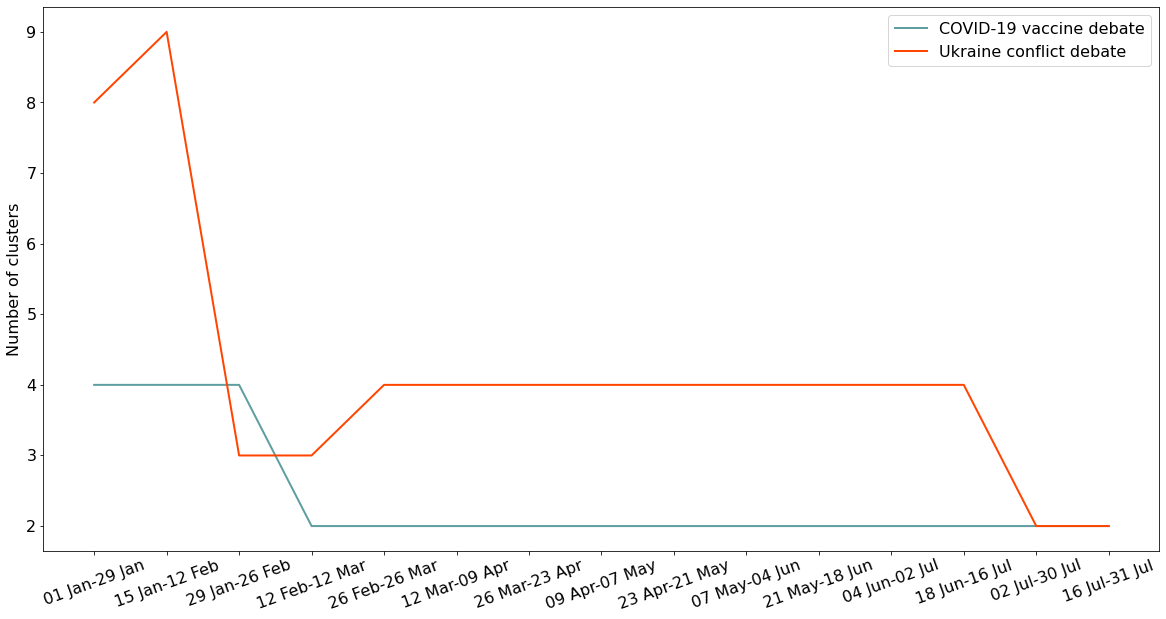

In [13]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(nb_clusters['Covid-19 vaccine debate'],color='cadetblue', linewidth=2)
ax.plot(nb_clusters['Ukraine conflict debate'],color='orangered', linewidth=2)


ax.set_ylabel('Number of clusters', fontsize='16')

labels = []
for p in range(len(periods)):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize='16')
ax.legend(['COVID-19 vaccine debate','Ukraine conflict debate'], fontsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.savefig('nb_clusters_evolution.pdf', format='pdf')
plt.show()

# Clusters in a 3D space

In [14]:
#Get weighted factors
global_data_vacc['x_final_alpha'] = 0.6*global_data_vacc['x_final']
global_data_vacc['y_C1_final_alpha'] = 0.2*global_data_vacc['y_pro_final']
global_data_vacc['y_C2_final_alpha'] = 0.2*global_data_vacc['y_anti_final']


global_data_ukr['x_final_alpha'] = 0.6*global_data_ukr['x_final']
global_data_ukr['y_C1_final_alpha'] = 0.2*global_data_ukr['y_proU_final']
global_data_ukr['y_C2_final_alpha'] = 0.2*global_data_ukr['y_proR_final']

In [15]:
X_glob_vacc = global_data_vacc[['x_final_alpha','y_C1_final_alpha','y_C2_final_alpha','cluster']]
X_glob_vacc.columns = ['x','y_C1','y_C2','cluster']

X_glob_ukr = global_data_ukr[['x_final_alpha','y_C1_final_alpha','y_C2_final_alpha','cluster']]
X_glob_ukr.columns = ['x','y_C1','y_C2','cluster']

In [16]:
users_vacc = clusters_vacc.columns.tolist()
users_ukr = clusters_ukr.columns.tolist()

In [17]:
def f_sigmoid_optim(x):
    return(x**(a)/(x**(a)+(1-x)**(a)))

In [18]:
a = 1/2
H_opinions_vacc = H_opinions_vacc.apply(f_sigmoid_optim)
H_sources1_vacc = H_sources1_vacc.apply(f_sigmoid_optim)
H_sources2_vacc = H_sources2_vacc.apply(f_sigmoid_optim)


a = 1/3
H_opinions_ukr = H_opinions_ukr.apply(f_sigmoid_optim)
H_sources1_ukr = H_sources1_ukr.apply(f_sigmoid_optim)
H_sources2_ukr = H_sources2_ukr.apply(f_sigmoid_optim)

## COVID-19 vaccine debate

### Clusters over the entire period

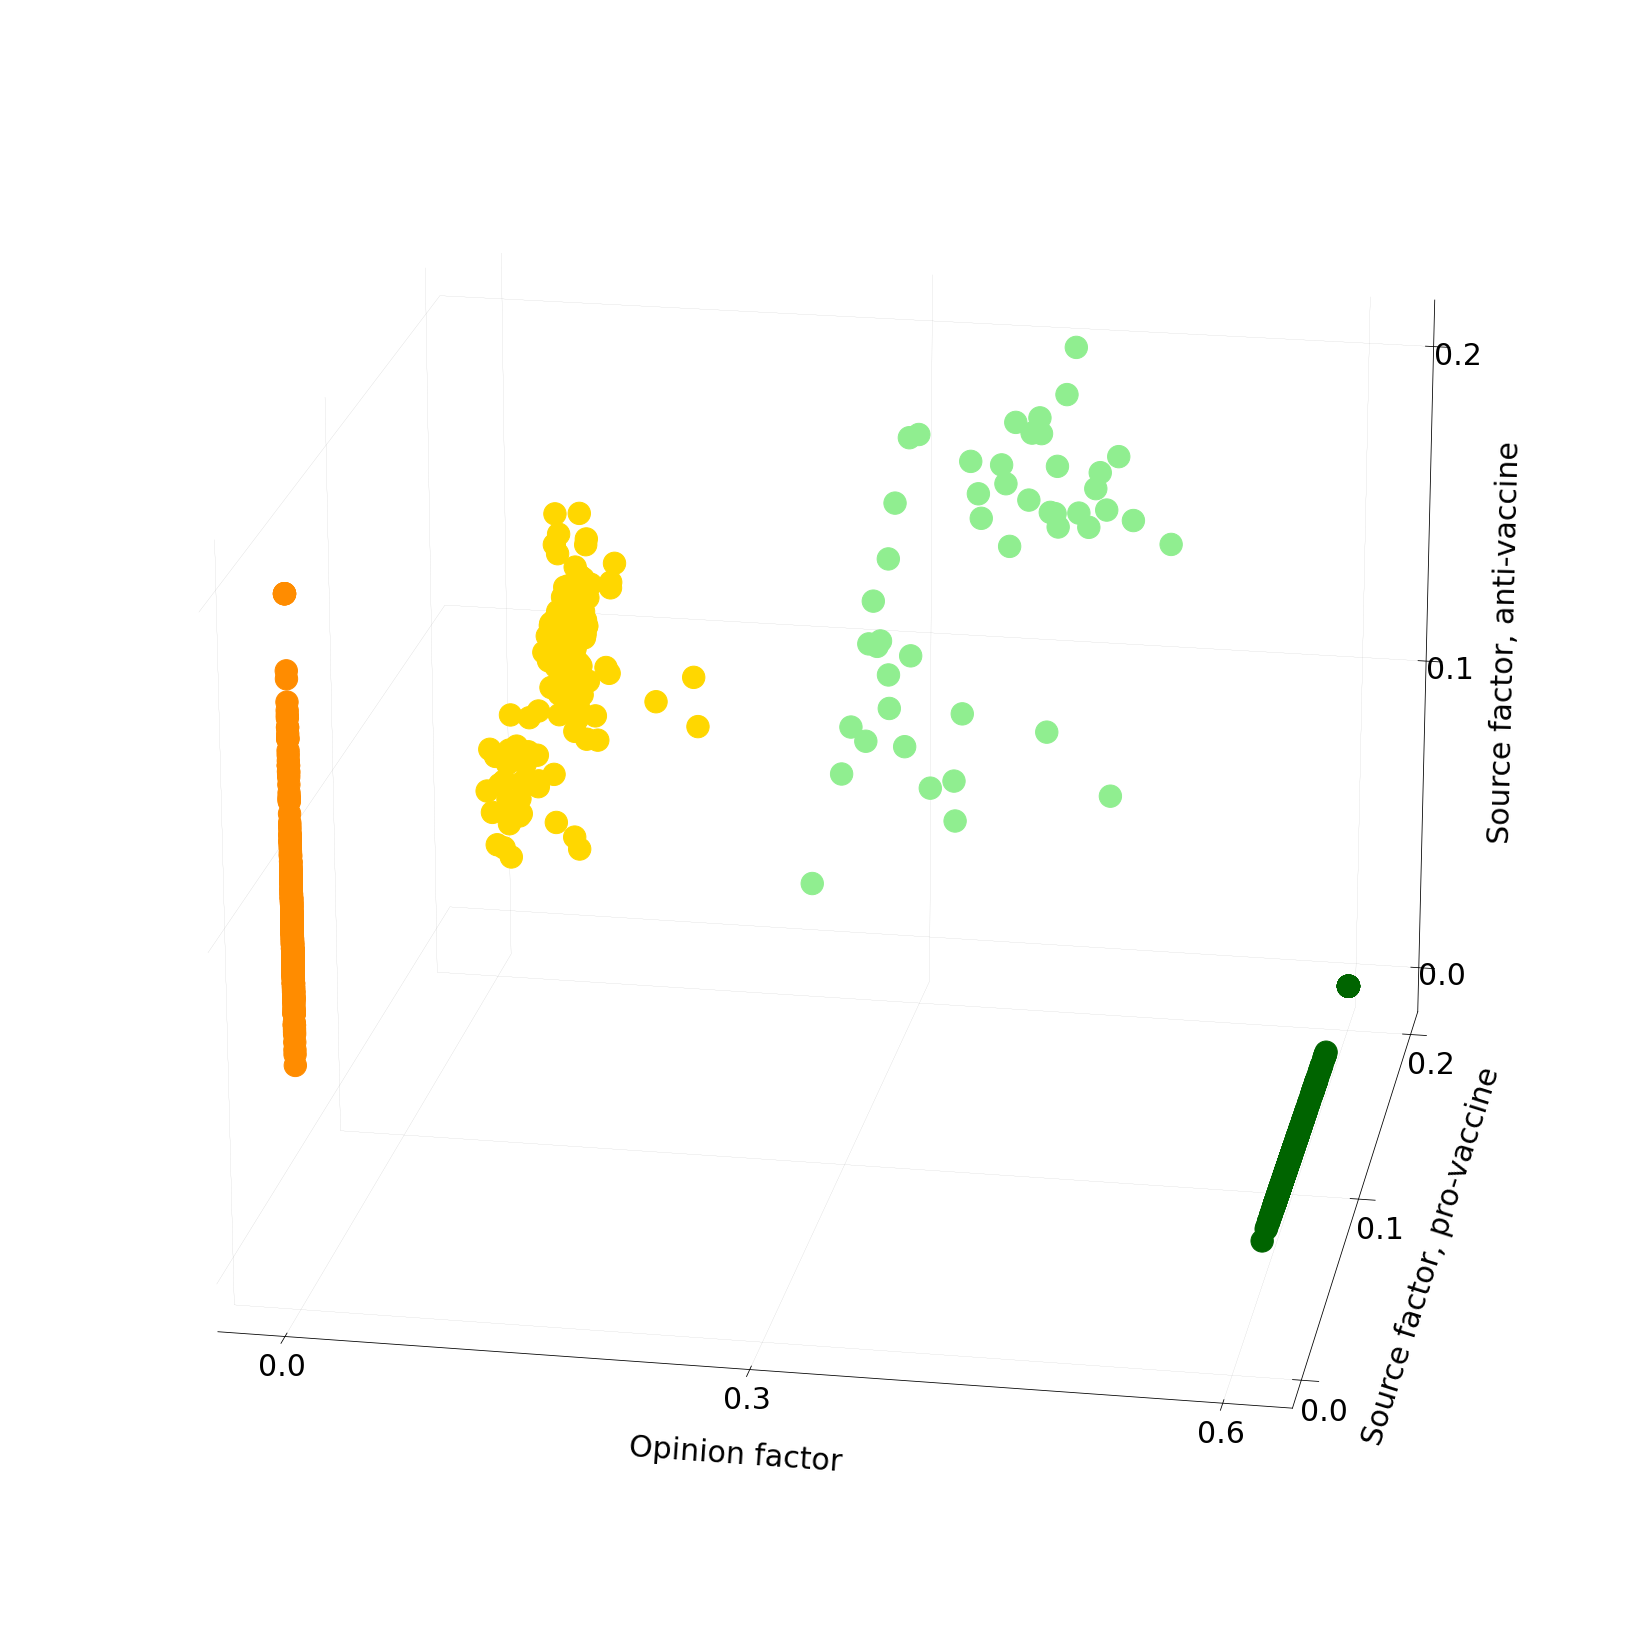

In [19]:
cluster_1_vacc=  X_glob_vacc[X_glob_vacc['cluster']==0]
cluster_2_vacc = X_glob_vacc[X_glob_vacc['cluster']==1]
cluster_3_vacc = X_glob_vacc[X_glob_vacc['cluster']==2]
cluster_4_vacc = X_glob_vacc[X_glob_vacc['cluster']==3]



fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_1_vacc['x'], cluster_1_vacc['y_C1'], cluster_1_vacc['y_C2'], marker ='o', c='darkgreen', s= 500, alpha=1)
ax.scatter(cluster_2_vacc['x'], cluster_2_vacc['y_C1'], cluster_2_vacc['y_C2'], marker ='o', c='darkorange', s= 500, alpha=1)
ax.scatter(cluster_3_vacc['x'], cluster_3_vacc['y_C1'], cluster_3_vacc['y_C2'], marker ='o', c='gold', s= 500, alpha=1)
ax.scatter(cluster_4_vacc['x'], cluster_4_vacc['y_C1'], cluster_4_vacc['y_C2'], marker ='o', c='lightgreen', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30, pad=10)
ax.tick_params(axis='z', labelsize=30, pad=10)

ax.view_init(20, -80)

plt.savefig('aggregate_clusters_vaccine.pdf', format='pdf')

### Clusters when the number of identified clusters changes

In [20]:
P1_vacc = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P1_vacc['x'] = 0.6 * H_opinions_trans_vacc.iloc[0,]
P1_vacc['y_C1'] = 0.2 * H_sources1_vacc.iloc[0,]
P1_vacc['y_C2'] = 0.2 * H_sources2_vacc.iloc[0,]

for u in users_vacc:
    P1_vacc.loc[u,'cluster'] = clusters_vacc.loc[0,u]

In [21]:
P2_vacc = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P2_vacc['x'] = 0.6 * H_opinions_trans_vacc.iloc[14,]
P2_vacc['y_C1'] = 0.2 * H_sources1_vacc.iloc[14,]
P2_vacc['y_C2'] = 0.2 * H_sources2_vacc.iloc[14,]

for u in users_vacc:
    P2_vacc.loc[u,'cluster'] = clusters_vacc.loc[14,u]

In [22]:
%matplotlib inline

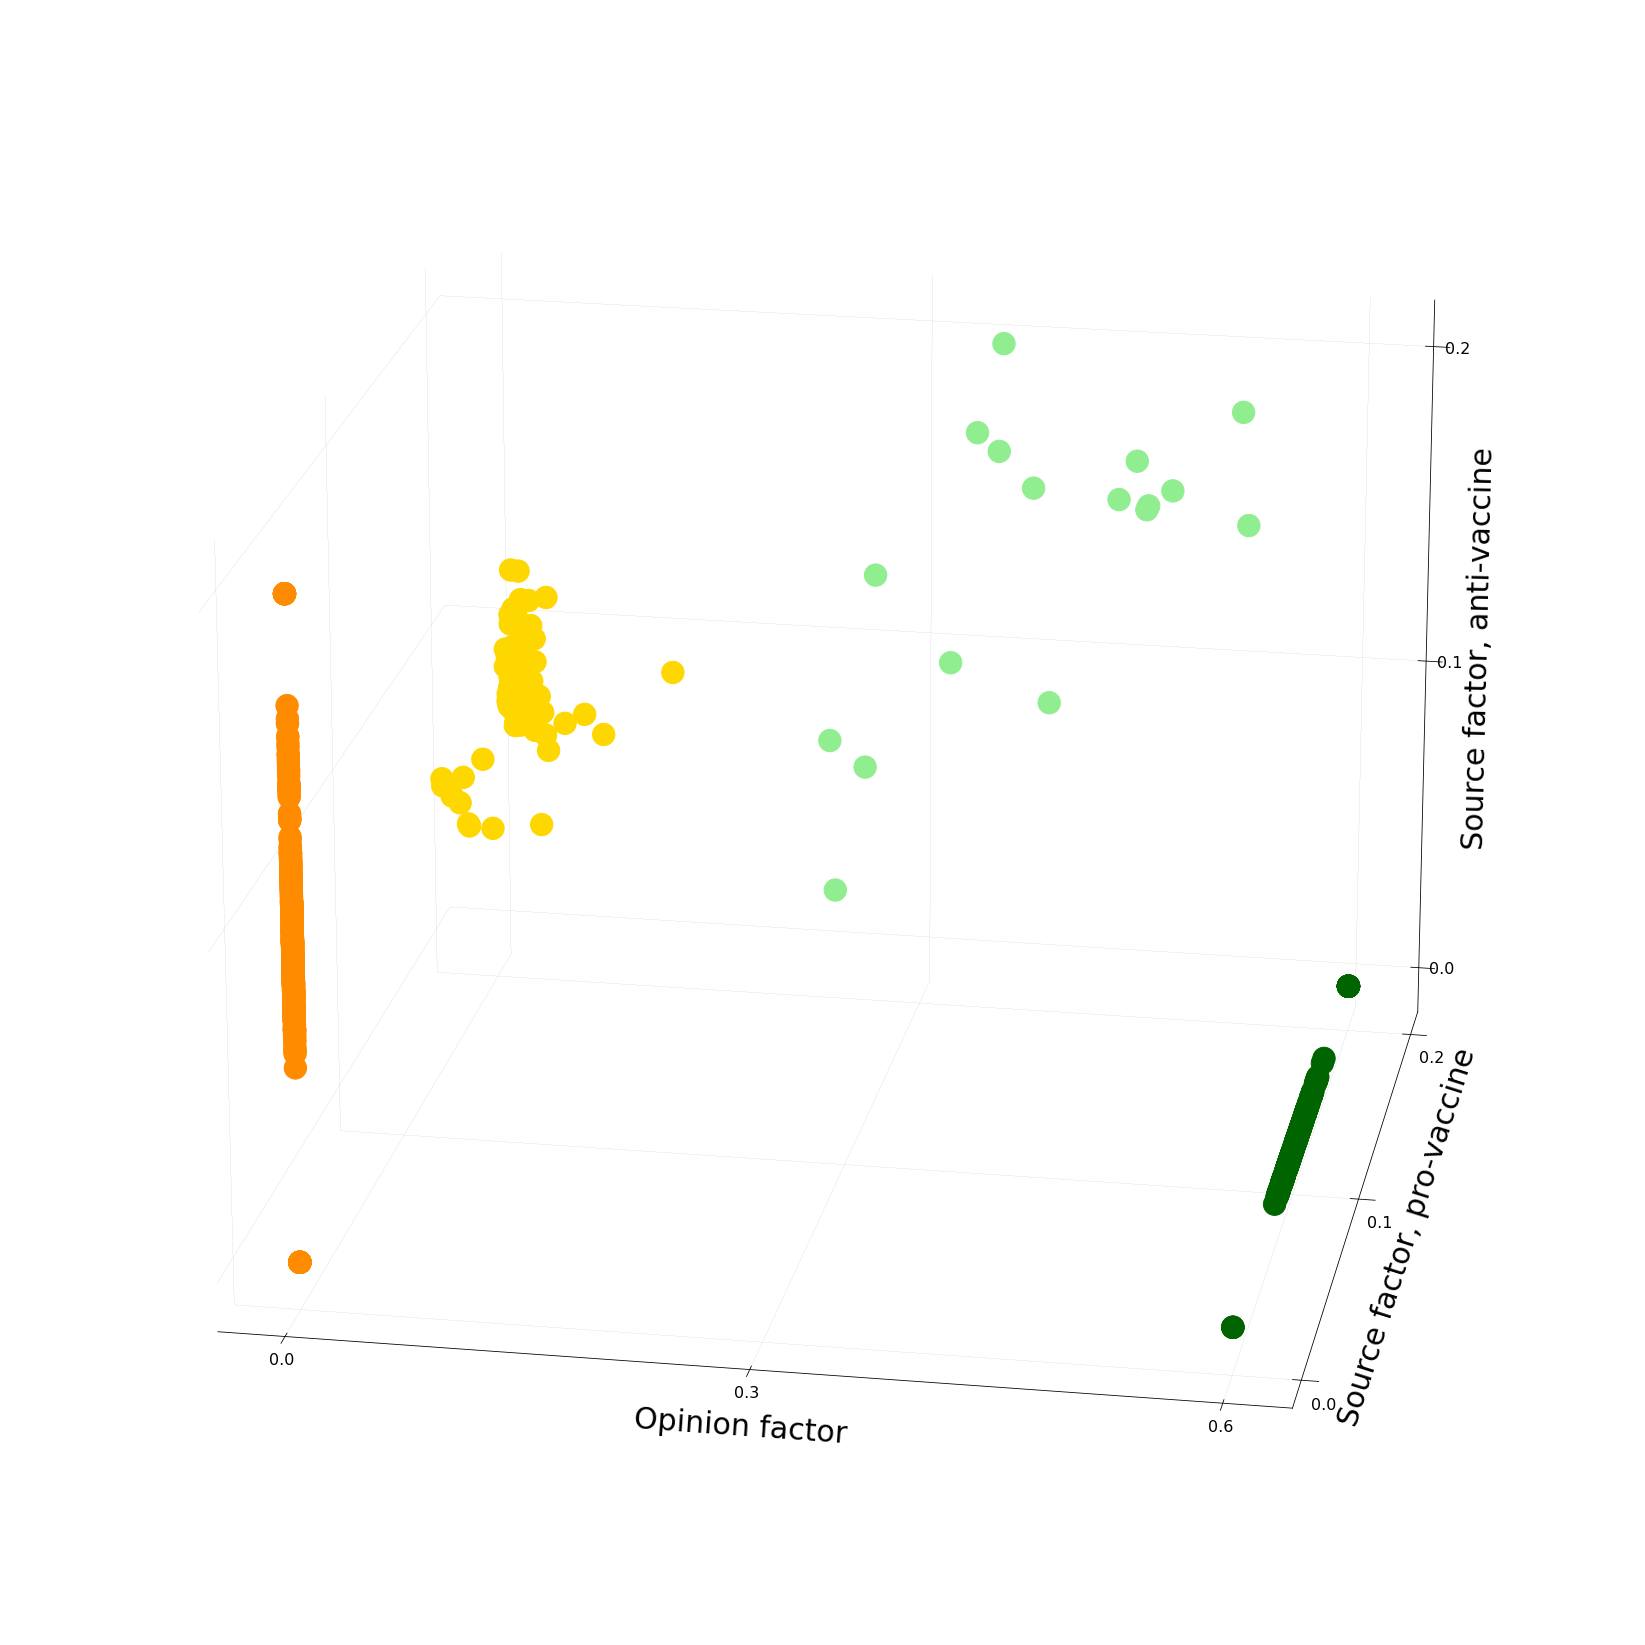

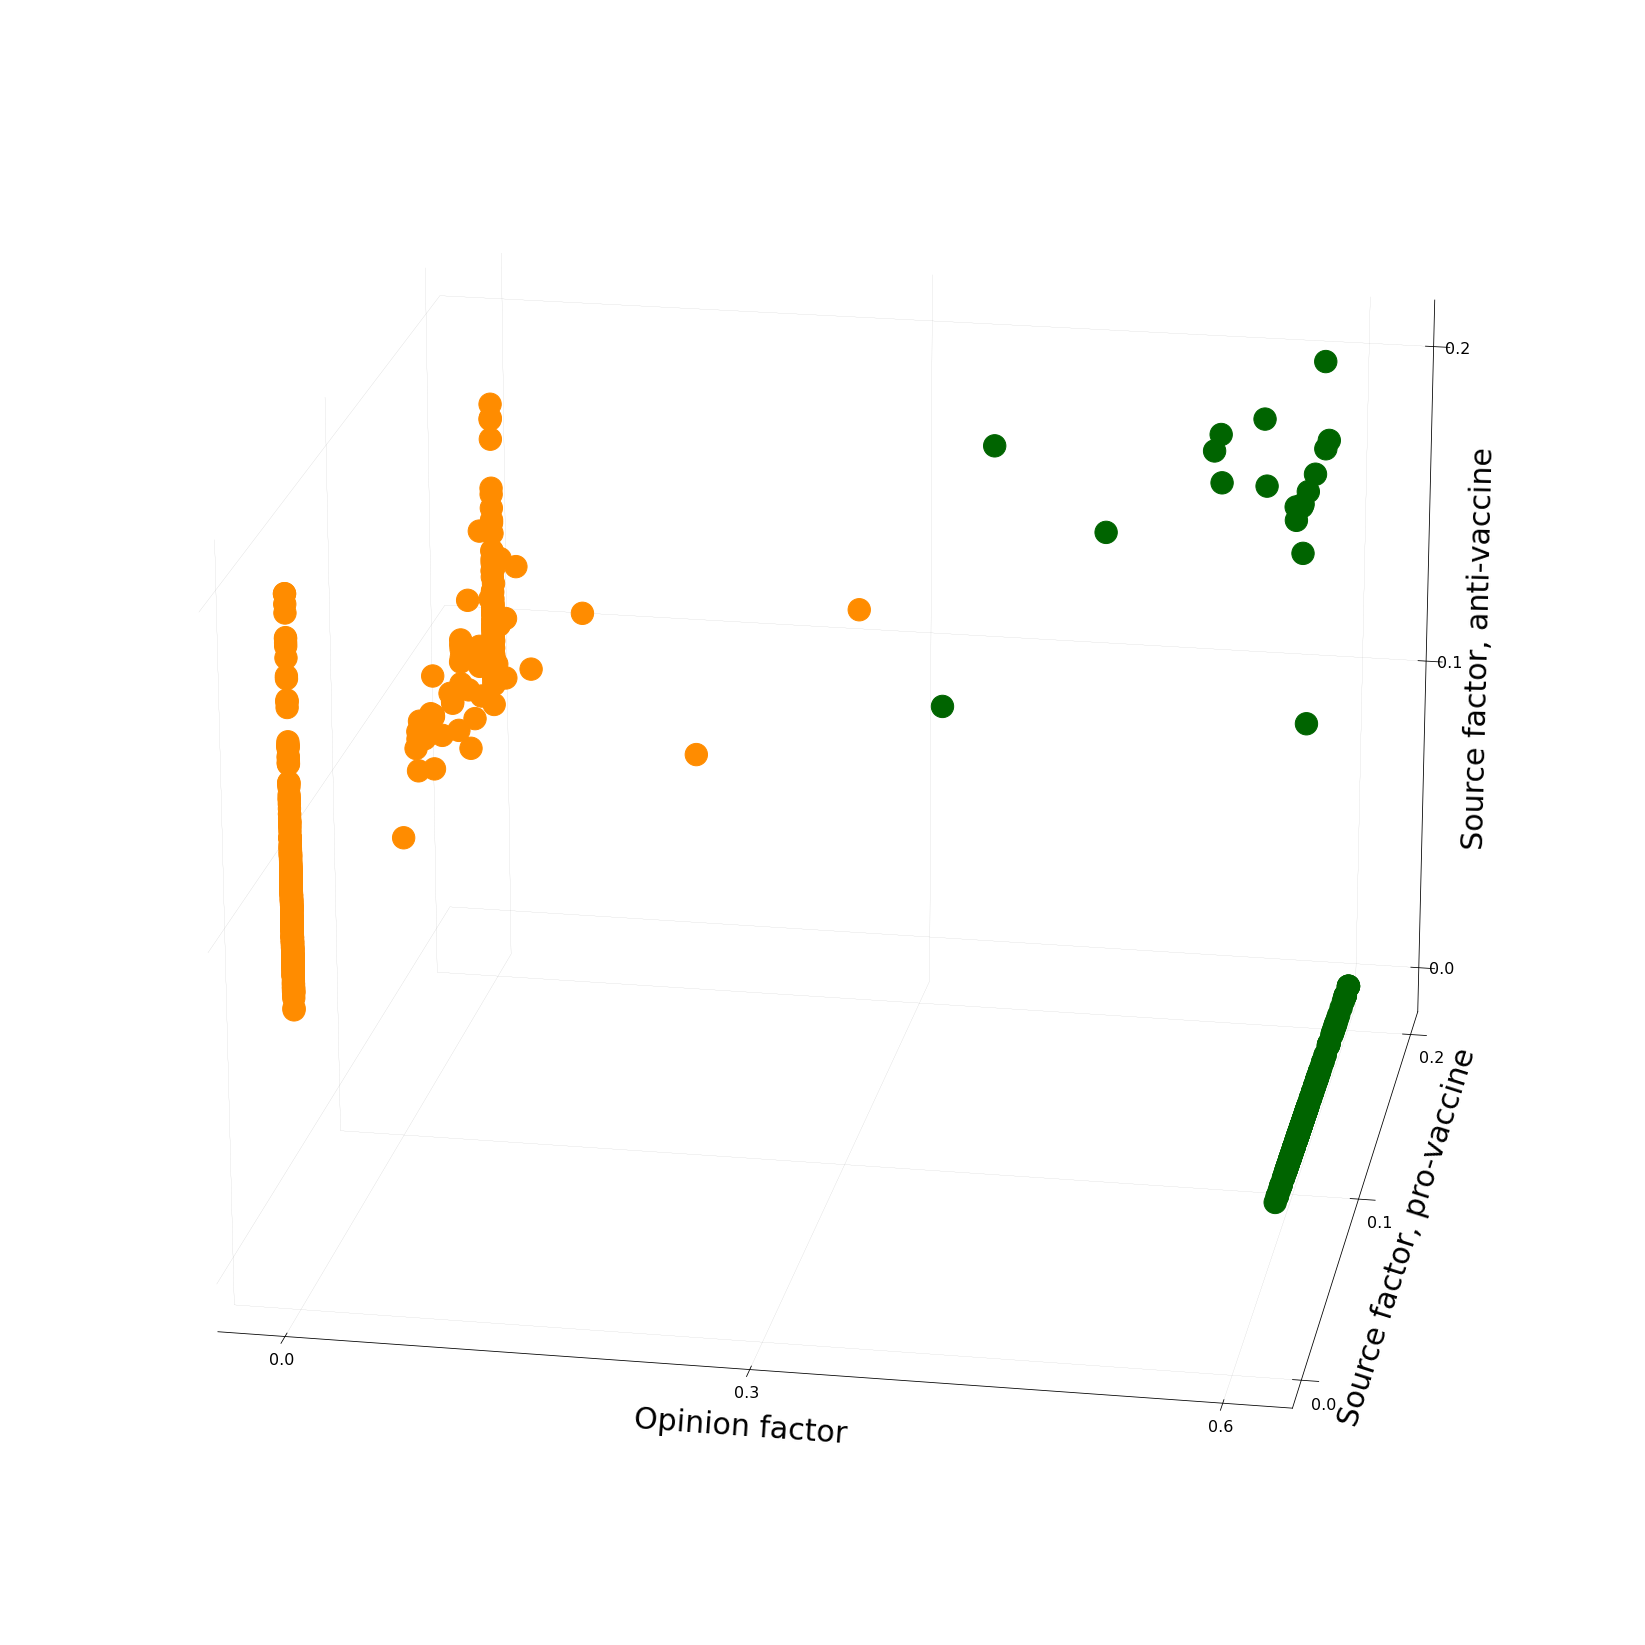

In [23]:
cluster_1_P1 = P1_vacc[P1_vacc['cluster']=='pro']
cluster_2_P1 = P1_vacc[P1_vacc['cluster']=='anti']
cluster_3_P1 = P1_vacc[P1_vacc['cluster']=='interAnti']
cluster_4_P1 = P1_vacc[P1_vacc['cluster']=='interPro']

cluster_1_P2 = P2_vacc[(P2_vacc['cluster']=='pro')]
cluster_2_P2 = P2_vacc[(P2_vacc['cluster']=='anti')]

fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_1_P1['x'], cluster_1_P1['y_C1'], cluster_1_P1['y_C2'], marker ='o', c='darkgreen', s= 500, alpha=1)
ax.scatter(cluster_2_P1['x'], cluster_2_P1['y_C1'], cluster_2_P1['y_C2'], marker ='o', c='darkorange', s= 500, alpha=1)
ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='gold', s= 500, alpha=1)
ax.scatter(cluster_4_P1['x'], cluster_4_P1['y_C1'], cluster_4_P1['y_C2'], marker ='o', c='lightgreen', s= 500, alpha=1)


ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=20)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=20)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=20)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)
plt.savefig('4clusters_vaccine.pdf', format='pdf')

fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.scatter(cluster_1_P2['x'], cluster_1_P2['y_C1'], cluster_1_P2['y_C2'], marker ='o', c='darkgreen', s= 500, alpha=1)
ax.scatter(cluster_2_P2['x'], cluster_2_P2['y_C1'], cluster_2_P2['y_C2'], marker ='o', c='darkorange', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=20)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=20)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=20)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)
plt.savefig('2clusters_vaccine.pdf', format='pdf')

### Evolution of intermediate users

In [24]:
inter_users_vacc = P1_vacc[P1_vacc['cluster']=='interPro'].index.tolist() + P1_vacc[P1_vacc['cluster']=='interAnti'].index.tolist() 

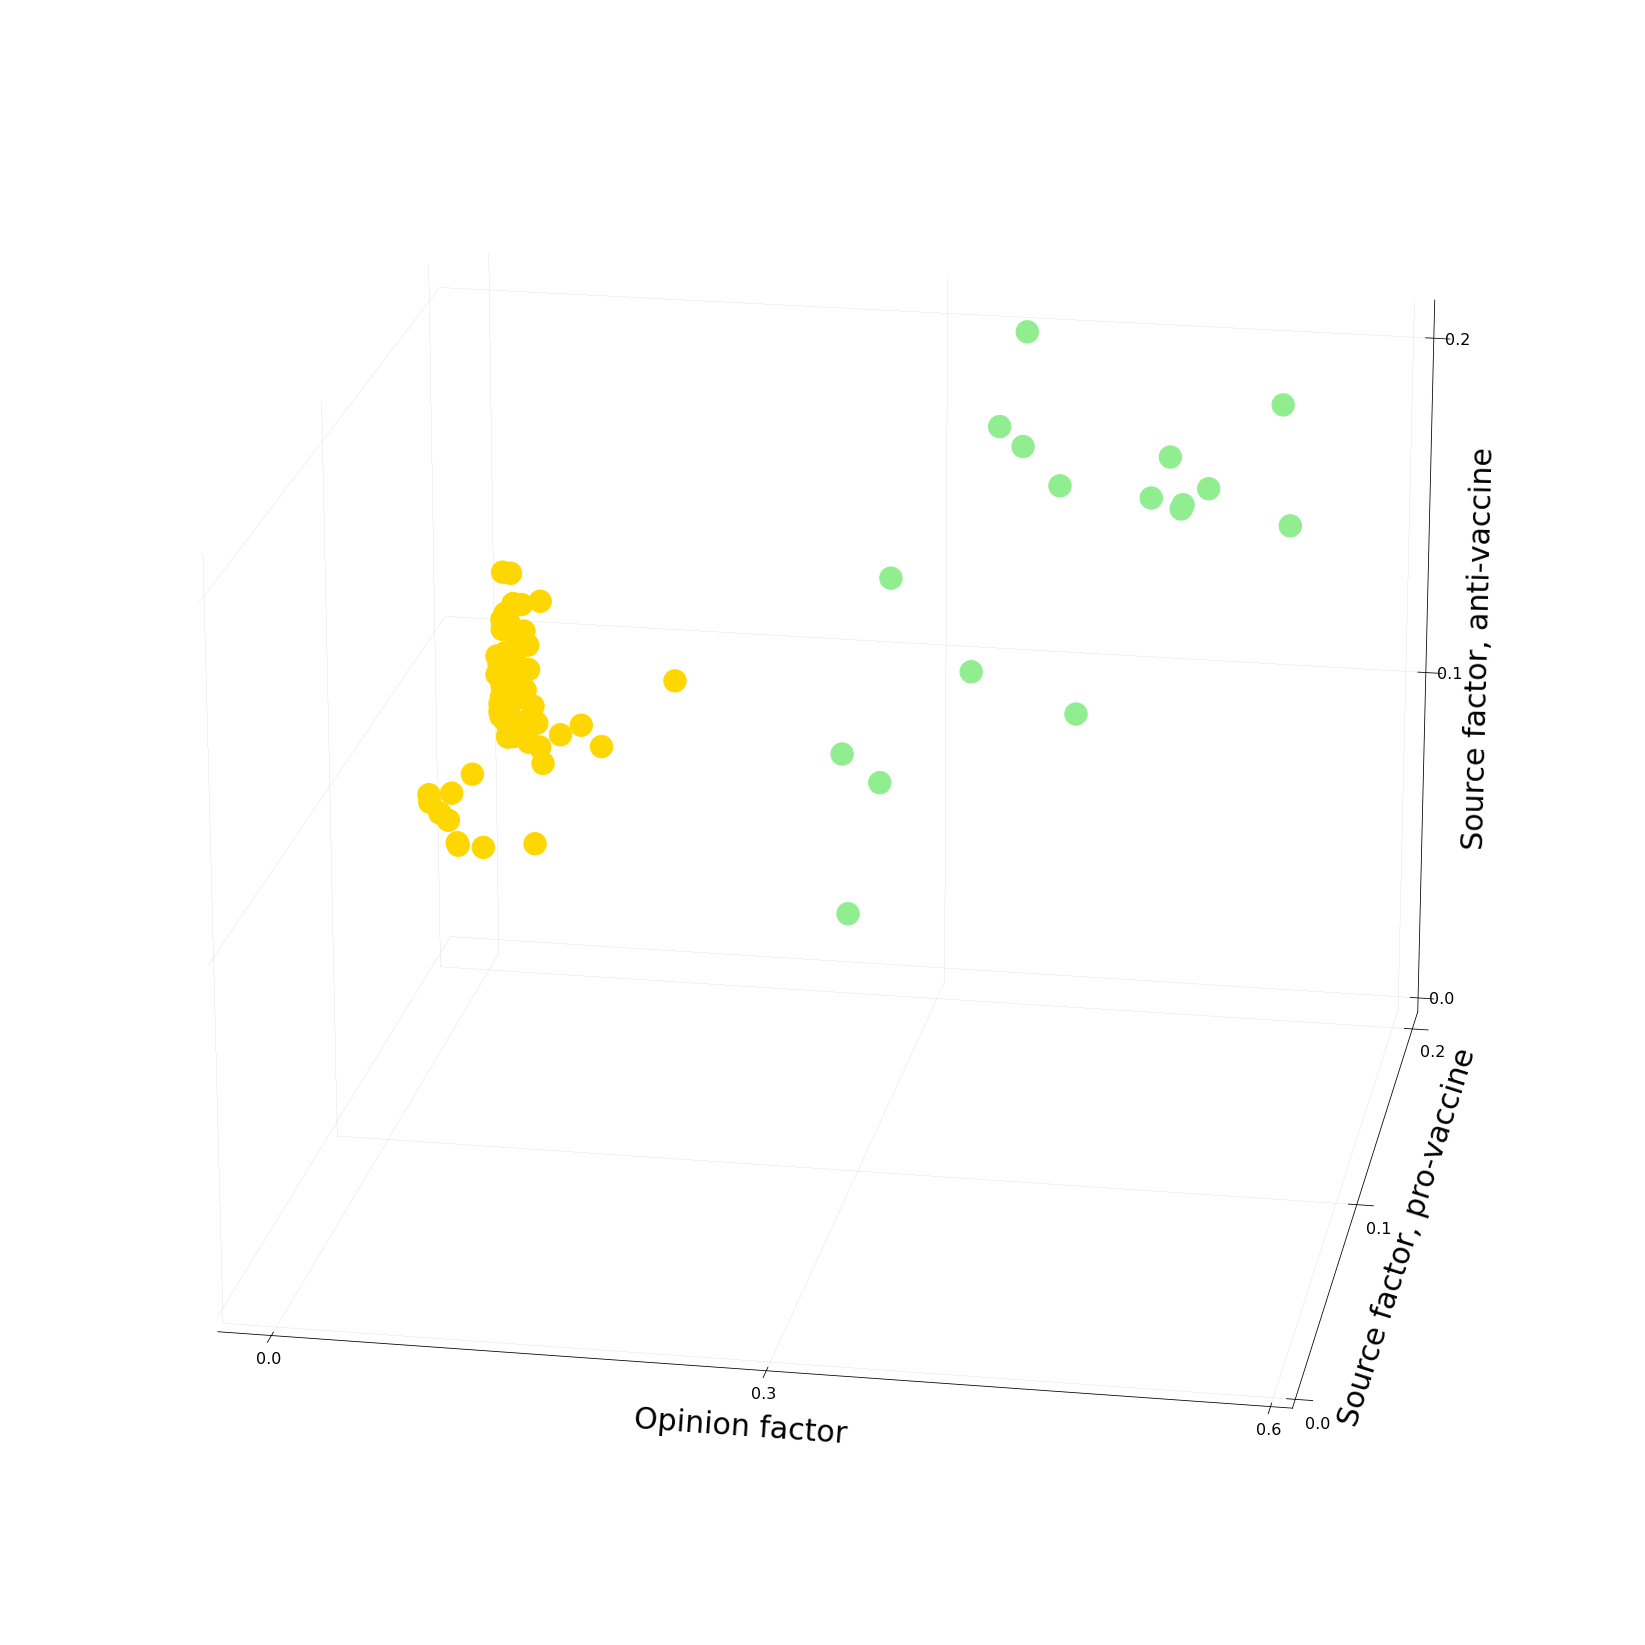

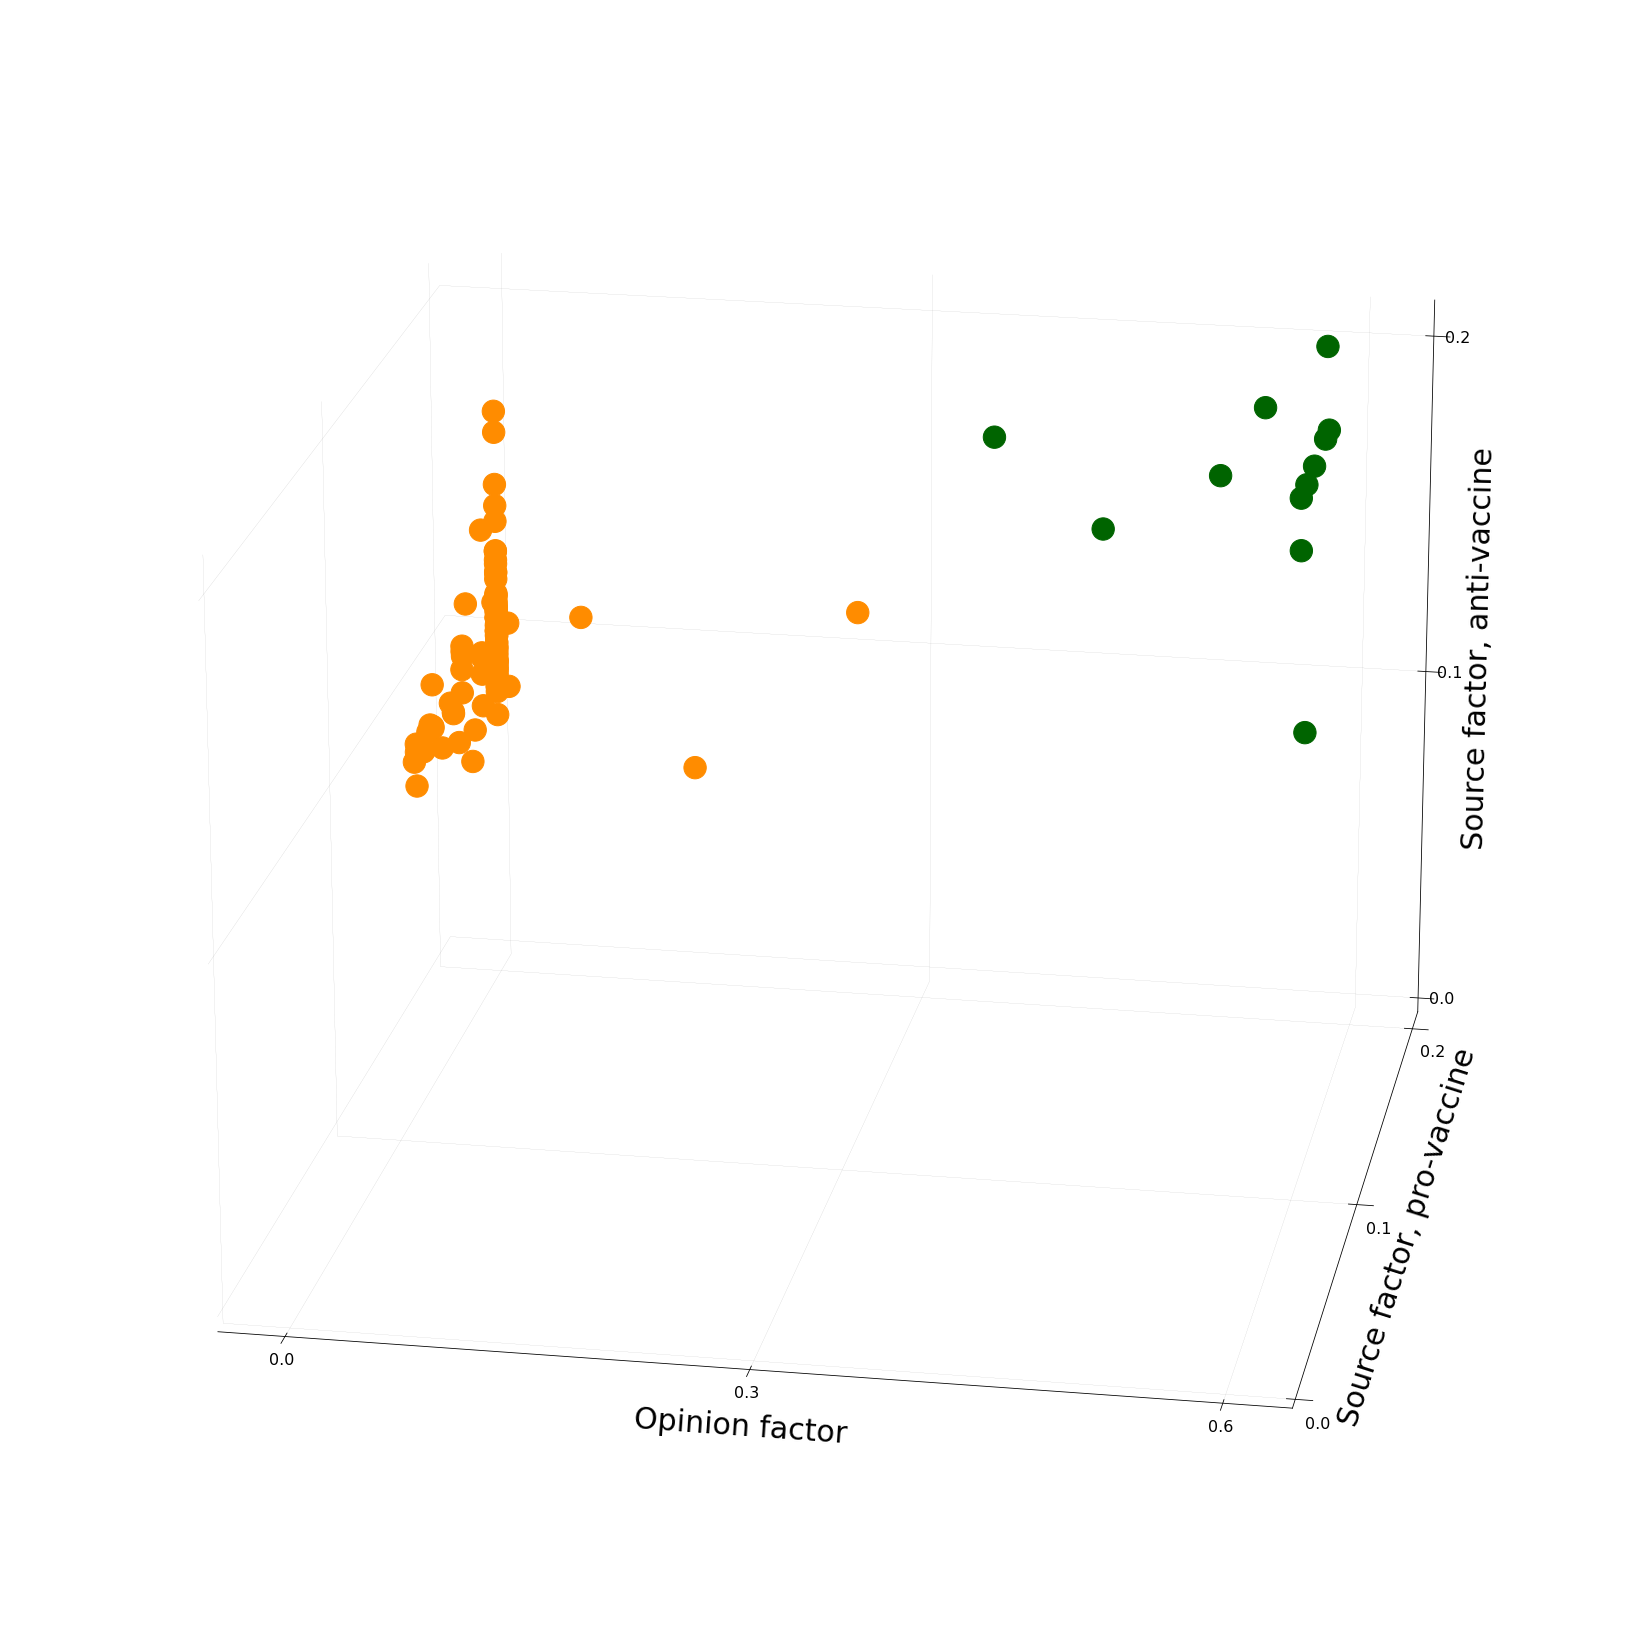

In [25]:
cluster_1_P1 = P1_vacc[P1_vacc['cluster']=='pro']
cluster_2_P1 = P1_vacc[P1_vacc['cluster']=='anti']
cluster_3_P1 = P1_vacc[P1_vacc['cluster']=='interAnti']
cluster_4_P1 = P1_vacc[P1_vacc['cluster']=='interPro']

cluster_1_P2 = P2_vacc[(P2_vacc['cluster']=='pro') & (P2_vacc.index.isin(inter_users_vacc))]
cluster_2_P2 = P2_vacc[(P2_vacc['cluster']=='anti') & (P2_vacc.index.isin(inter_users_vacc))]

fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='gold', s= 500, alpha=1)
ax.scatter(cluster_4_P1['x'], cluster_4_P1['y_C1'], cluster_4_P1['y_C2'], marker ='o', c='lightgreen', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)


ax.set_xlabel('Opinion factor', fontsize='30', labelpad=20)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=20)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=20)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)
plt.savefig('inter_convergence_vaccine.pdf', format='pdf')

fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_1_P2['x'], cluster_1_P2['y_C1'], cluster_1_P2['y_C2'], marker ='o', c='darkgreen', s= 500, alpha=1)
ax.scatter(cluster_2_P2['x'], cluster_2_P2['y_C1'], cluster_2_P2['y_C2'], marker ='o', c='darkorange', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=20)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=20)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=20)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)
plt.savefig('inter_polarized_vaccine.pdf', format='pdf')

## Ukraine

### Clusters over the entire period

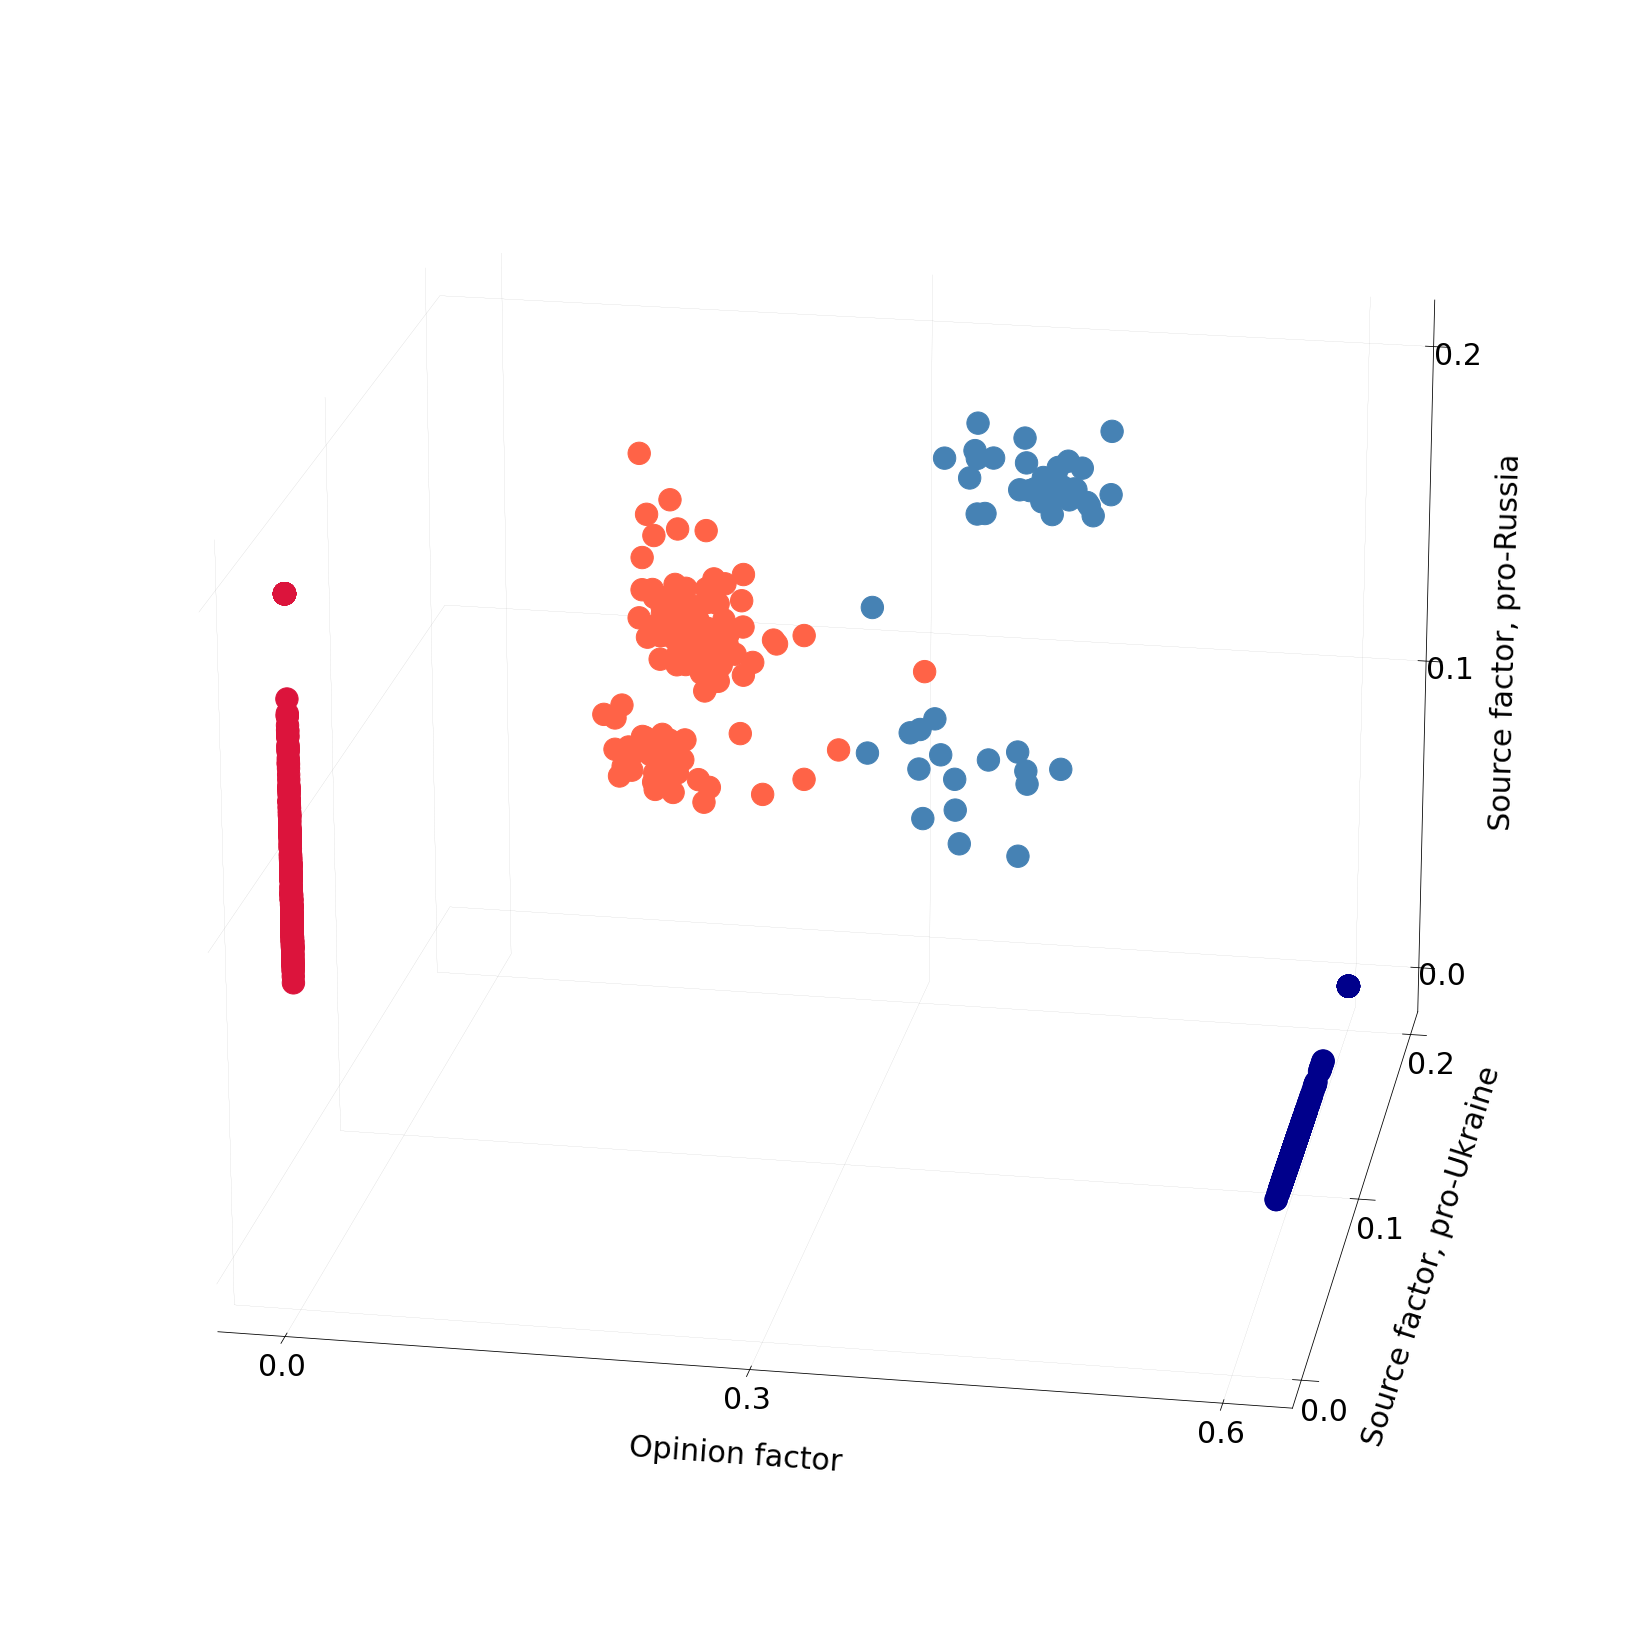

In [26]:
cluster_1_ukr=  X_glob_ukr[X_glob_ukr['cluster']==0]
cluster_2_ukr = X_glob_ukr[X_glob_ukr['cluster']==1]
cluster_3_ukr = X_glob_ukr[X_glob_ukr['cluster']==2]
cluster_4_ukr = X_glob_ukr[X_glob_ukr['cluster']==3]



fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.scatter(cluster_1_ukr['x'], cluster_1_ukr['y_C1'], cluster_1_ukr['y_C2'], marker ='o', c='darkblue', s= 500, alpha=1)
ax.scatter(cluster_2_ukr['x'], cluster_2_ukr['y_C1'], cluster_2_ukr['y_C2'], marker ='o', c='crimson', s= 500, alpha=1)
ax.scatter(cluster_3_ukr['x'], cluster_3_ukr['y_C1'], cluster_3_ukr['y_C2'], marker ='o', c='tomato', s= 500, alpha=1)
ax.scatter(cluster_4_ukr['x'], cluster_4_ukr['y_C1'], cluster_4_ukr['y_C2'], marker ='o', c='steelblue', s= 500, alpha=1)


ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-Ukraine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, pro-Russia', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30, pad=10)
ax.tick_params(axis='z', labelsize=30, pad=10)

ax.view_init(20, -80)
plt.savefig('aggregate_clusters_ukraine.pdf', format='pdf')

### Clusters when the number of identified clusters changes

In [27]:
P1_ukr = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P1_ukr['x'] = 0.6 * H_opinions_trans_ukr.iloc[3,]
P1_ukr['y_C1'] = 0.2 * H_sources1_ukr.iloc[3,]
P1_ukr['y_C2'] = 0.2 * H_sources2_ukr.iloc[3,]

for u in users_ukr:
    P1_ukr.loc[u,'cluster'] = clusters_ukr.loc[3,u]

In [28]:
P2_ukr = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P2_ukr['x'] = 0.6 * H_opinions_trans_ukr.iloc[4,]
P2_ukr['y_C1'] = 0.2 * H_sources1_ukr.iloc[4,]
P2_ukr['y_C2'] = 0.2 * H_sources2_ukr.iloc[4,]

for u in users_ukr:
    P2_ukr.loc[u,'cluster'] = clusters_ukr.loc[4,u]

In [29]:
P3_ukr = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P3_ukr['x'] = 0.6 * H_opinions_trans_ukr.iloc[14,]
P3_ukr['y_C1'] = 0.2 * H_sources1_ukr.iloc[14,]
P3_ukr['y_C2'] = 0.2 * H_sources2_ukr.iloc[14,]

for u in users_ukr:
    P3_ukr.loc[u,'cluster'] = clusters_ukr.loc[14,u]

In [30]:
%matplotlib inline

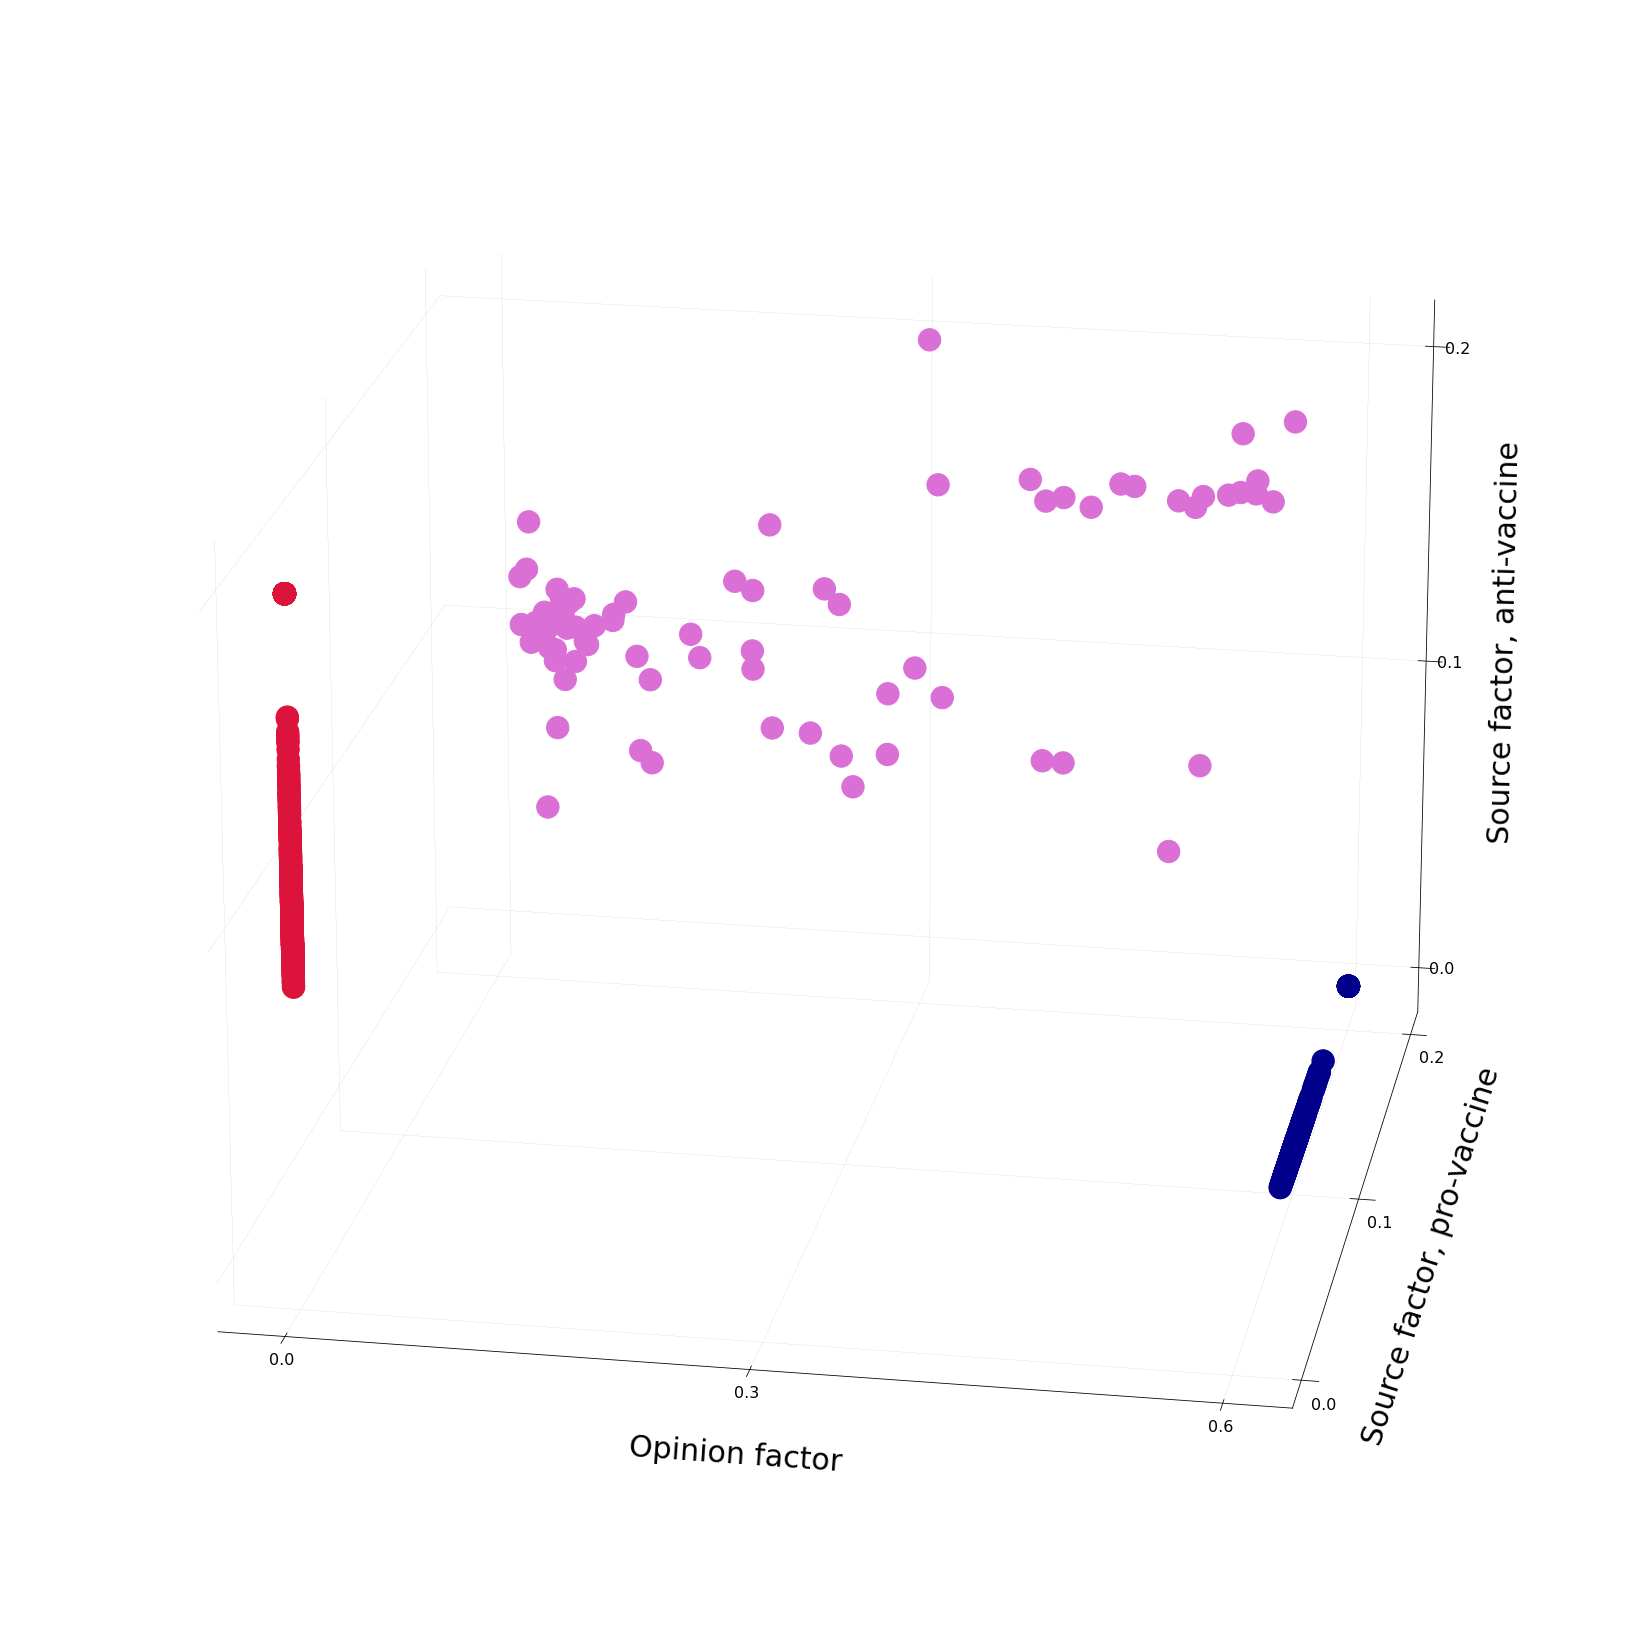

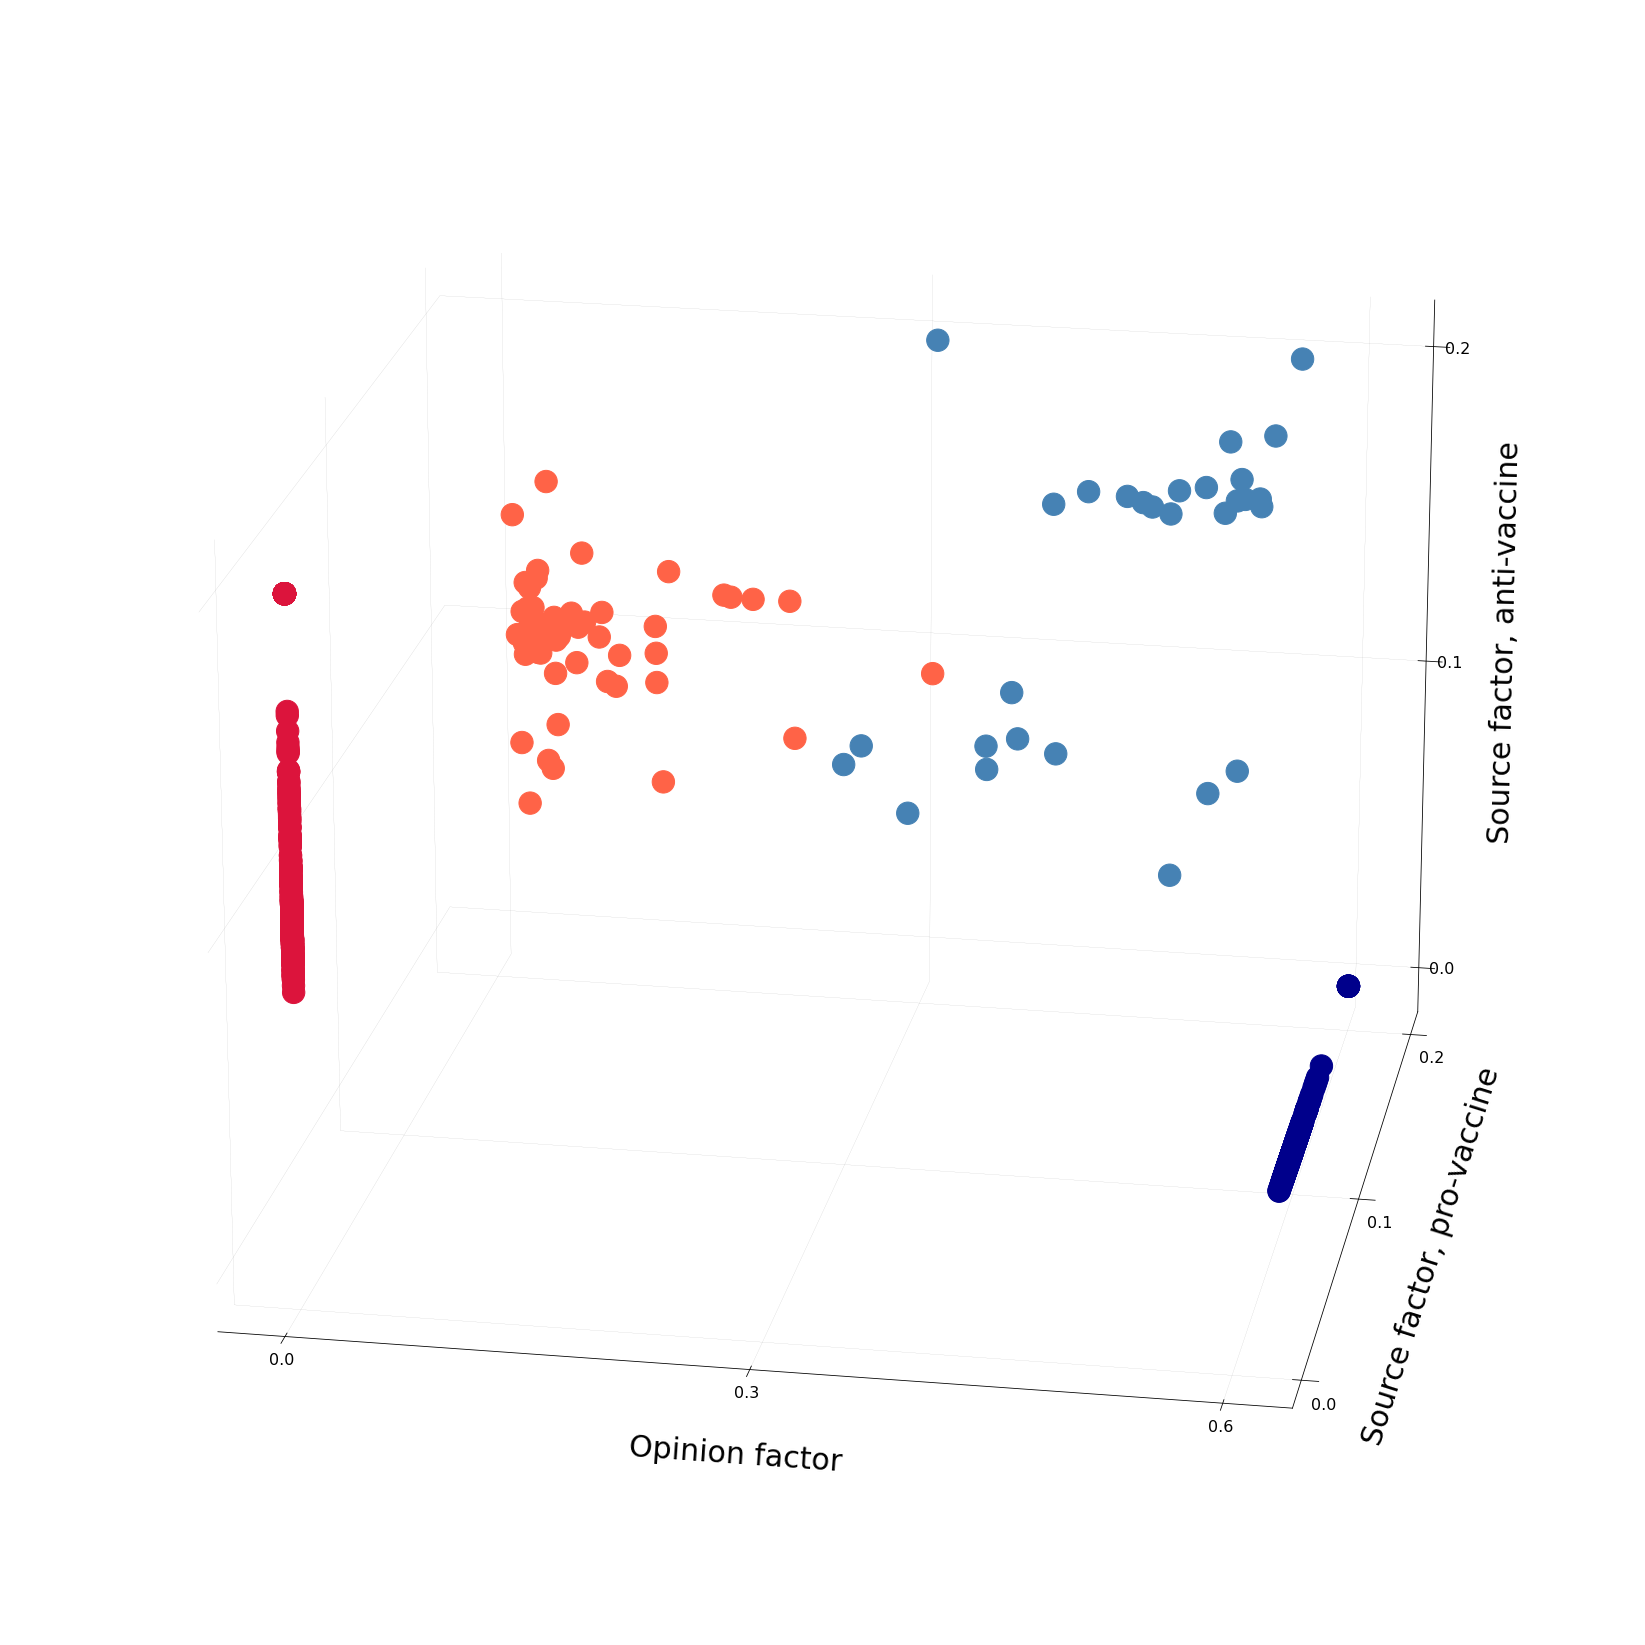

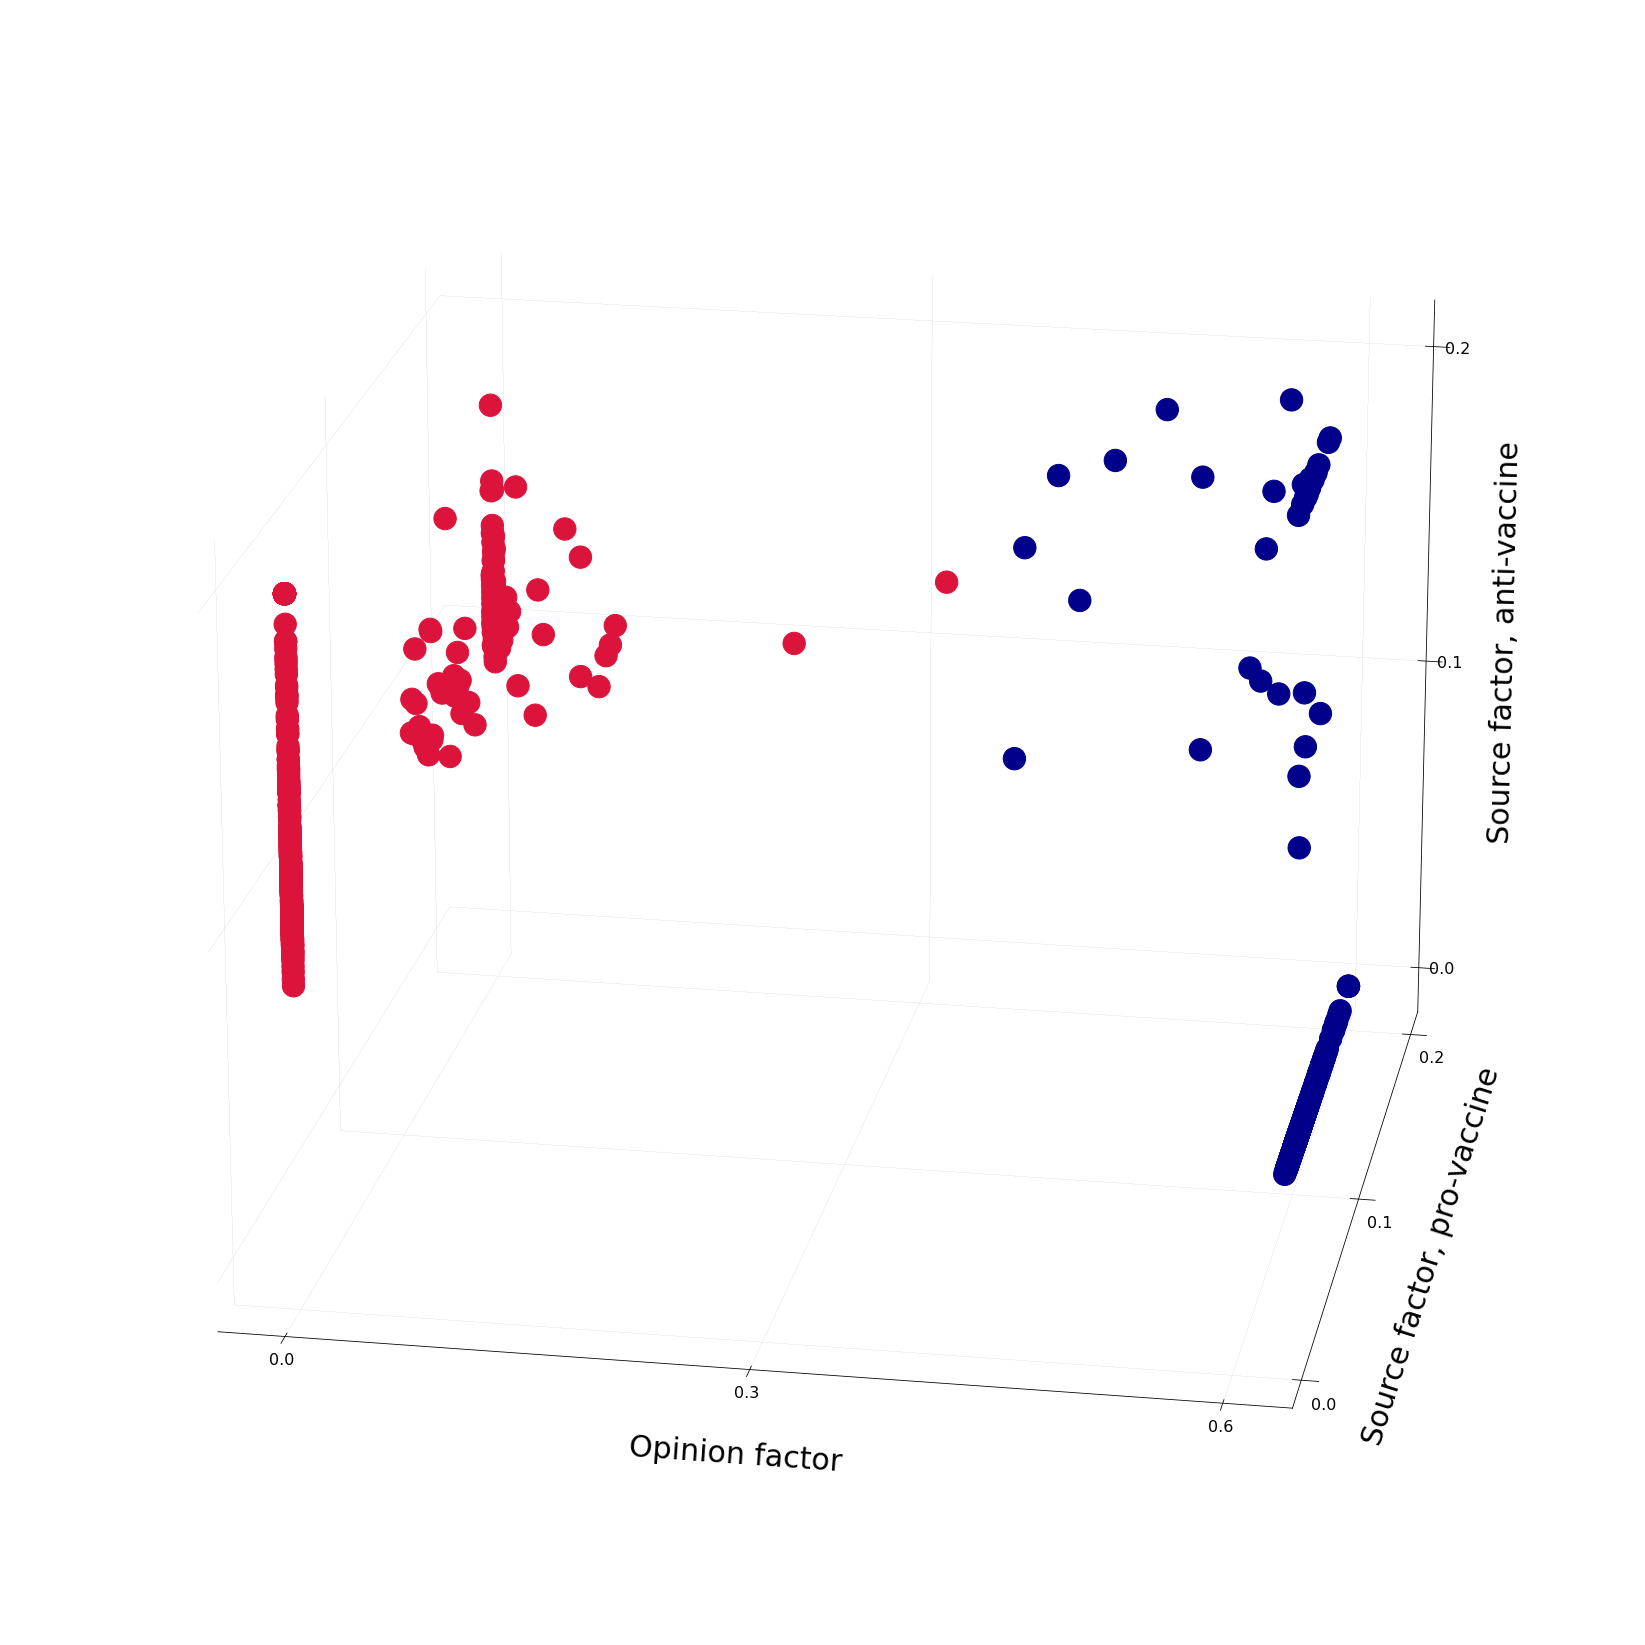

In [31]:
cluster_1_P1 = P1_ukr[P1_ukr['cluster']=='proR']
cluster_2_P1 = P1_ukr[P1_ukr['cluster']=='proU']
cluster_3_P1 = P1_ukr[P1_ukr['cluster']=='inter']

cluster_1_P2 = P2_ukr[P2_ukr['cluster']=='proR']
cluster_2_P2 = P2_ukr[P2_ukr['cluster']=='proU']
cluster_3_P2 = P2_ukr[(P2_ukr['cluster']=='interR')]
cluster_4_P2 = P2_ukr[(P2_ukr['cluster']=='interU')]

cluster_1_P3 = P3_ukr[(P3_ukr['cluster']=='proR')]
cluster_2_P3 = P3_ukr[(P3_ukr['cluster']=='proU')]


fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.scatter(cluster_1_P1['x'], cluster_1_P1['y_C1'], cluster_1_P1['y_C2'], marker ='o', c='crimson', s= 500, alpha=1)
ax.scatter(cluster_2_P1['x'], cluster_2_P1['y_C1'], cluster_2_P1['y_C2'], marker ='o', c='darkblue', s= 500, alpha=1)
ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='orchid', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)
plt.savefig('3clusters_ukraine.pdf', format='pdf')

fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_1_P2['x'], cluster_1_P2['y_C1'], cluster_1_P2['y_C2'], marker ='o', c='crimson', s= 500, alpha=1)
ax.scatter(cluster_2_P2['x'], cluster_2_P2['y_C1'], cluster_2_P2['y_C2'], marker ='o', c='darkblue', s= 500, alpha=1)
ax.scatter(cluster_3_P2['x'], cluster_3_P2['y_C1'], cluster_3_P2['y_C2'], marker ='o', c='tomato', s= 500, alpha=1)
ax.scatter(cluster_4_P2['x'], cluster_4_P2['y_C1'], cluster_4_P2['y_C2'], marker ='o', c='steelblue', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)
plt.savefig('4clusters_ukraine.pdf', format='pdf')

fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_1_P3['x'], cluster_1_P3['y_C1'], cluster_1_P3['y_C2'], marker ='o', c='crimson', s= 500, alpha=1)
ax.scatter(cluster_2_P3['x'], cluster_2_P3['y_C1'], cluster_2_P3['y_C2'], marker ='o', c='darkblue', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)
plt.savefig('2clusters_ukraine.pdf', format='pdf')

### Evolution of intermediate users

In [32]:
inter_users_ukr = P1_ukr[P1_ukr['cluster']=='inter'].index.tolist()

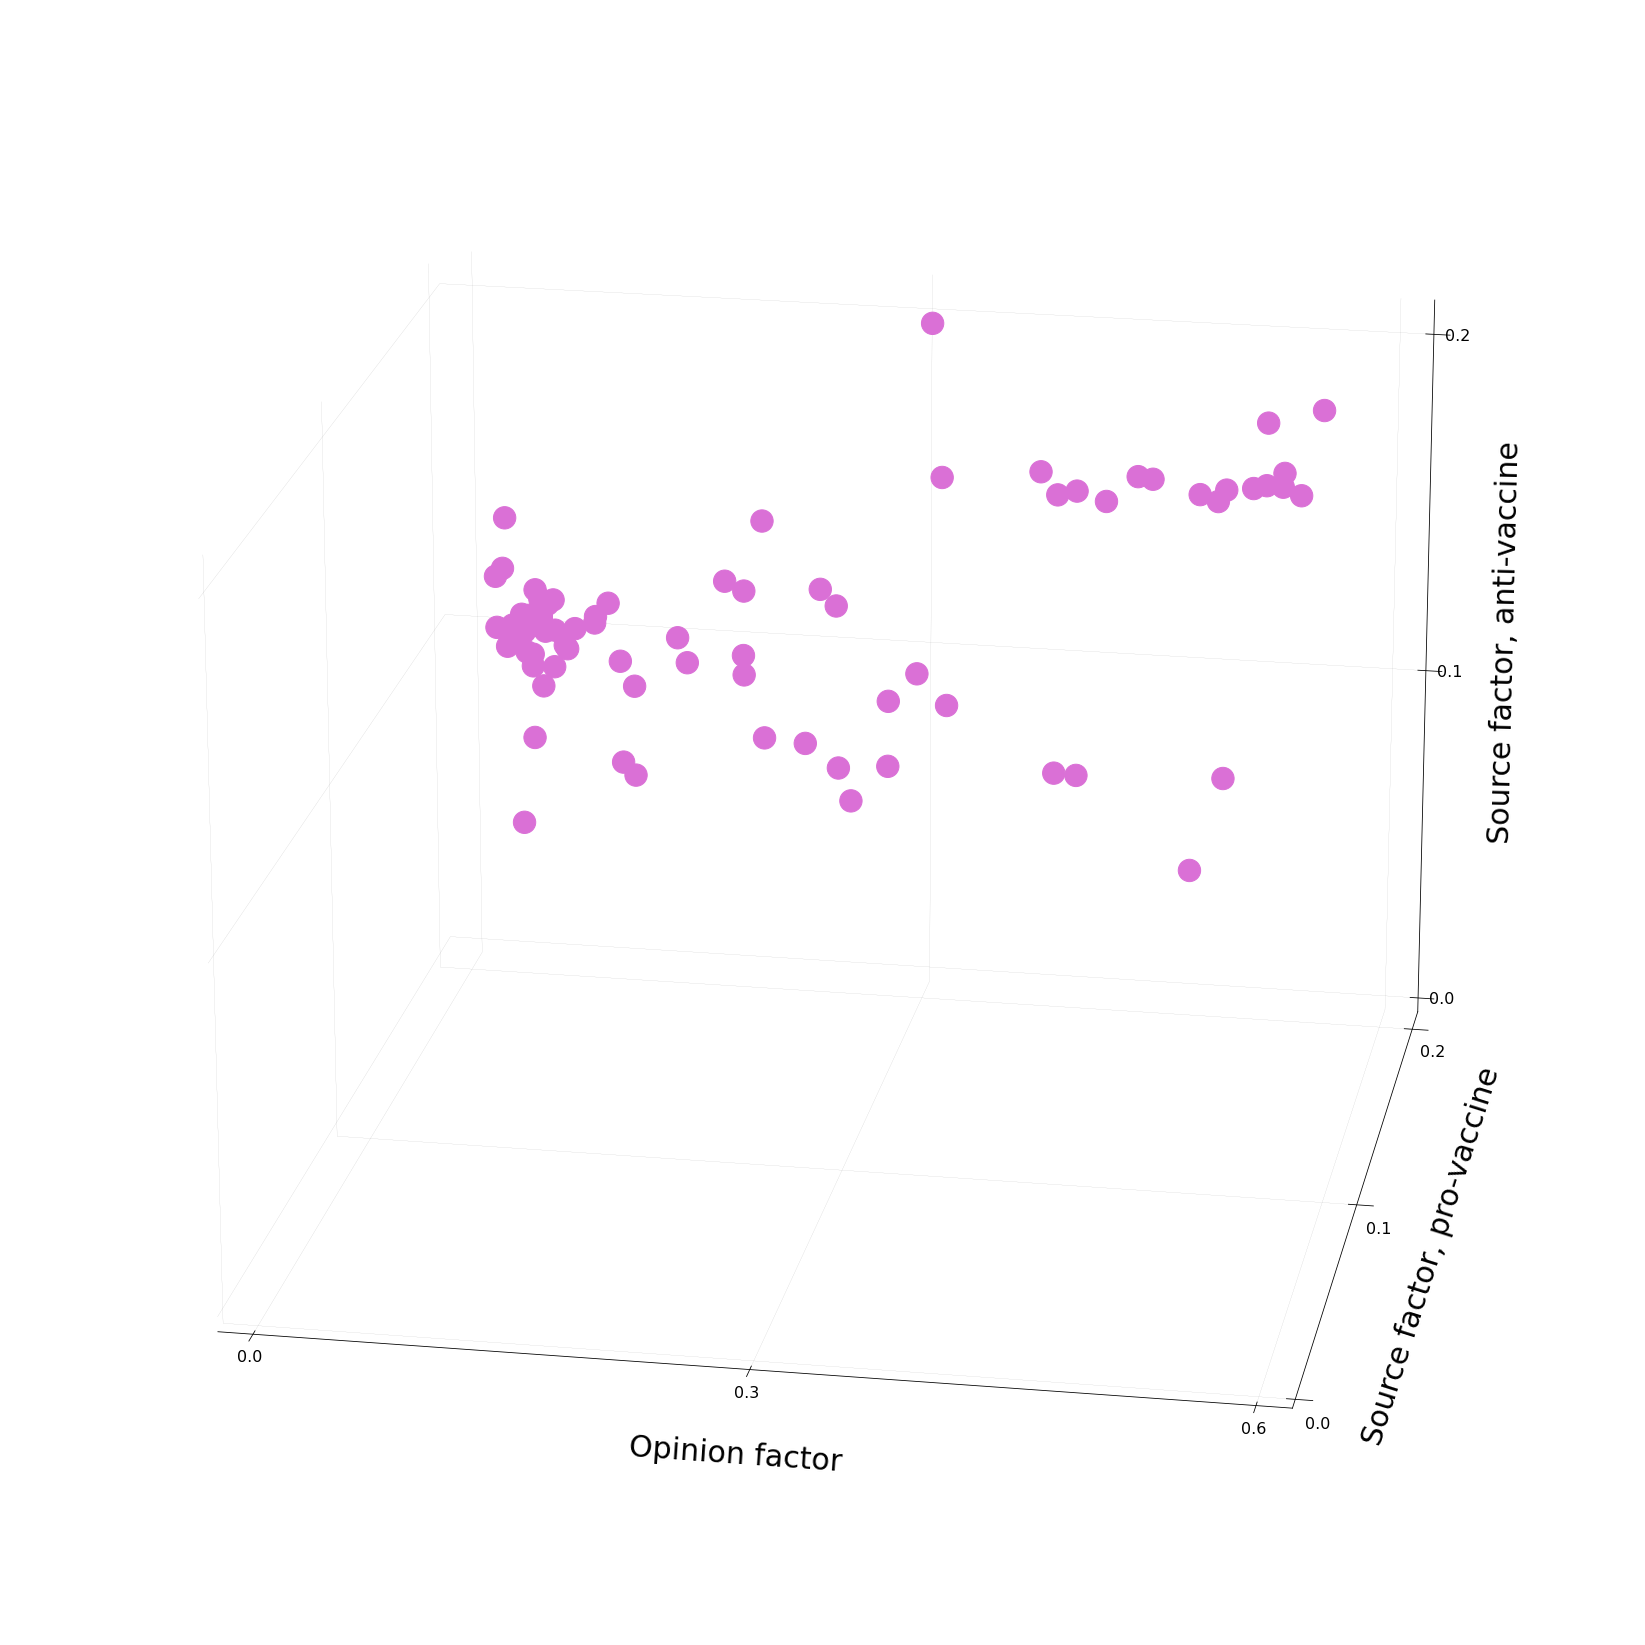

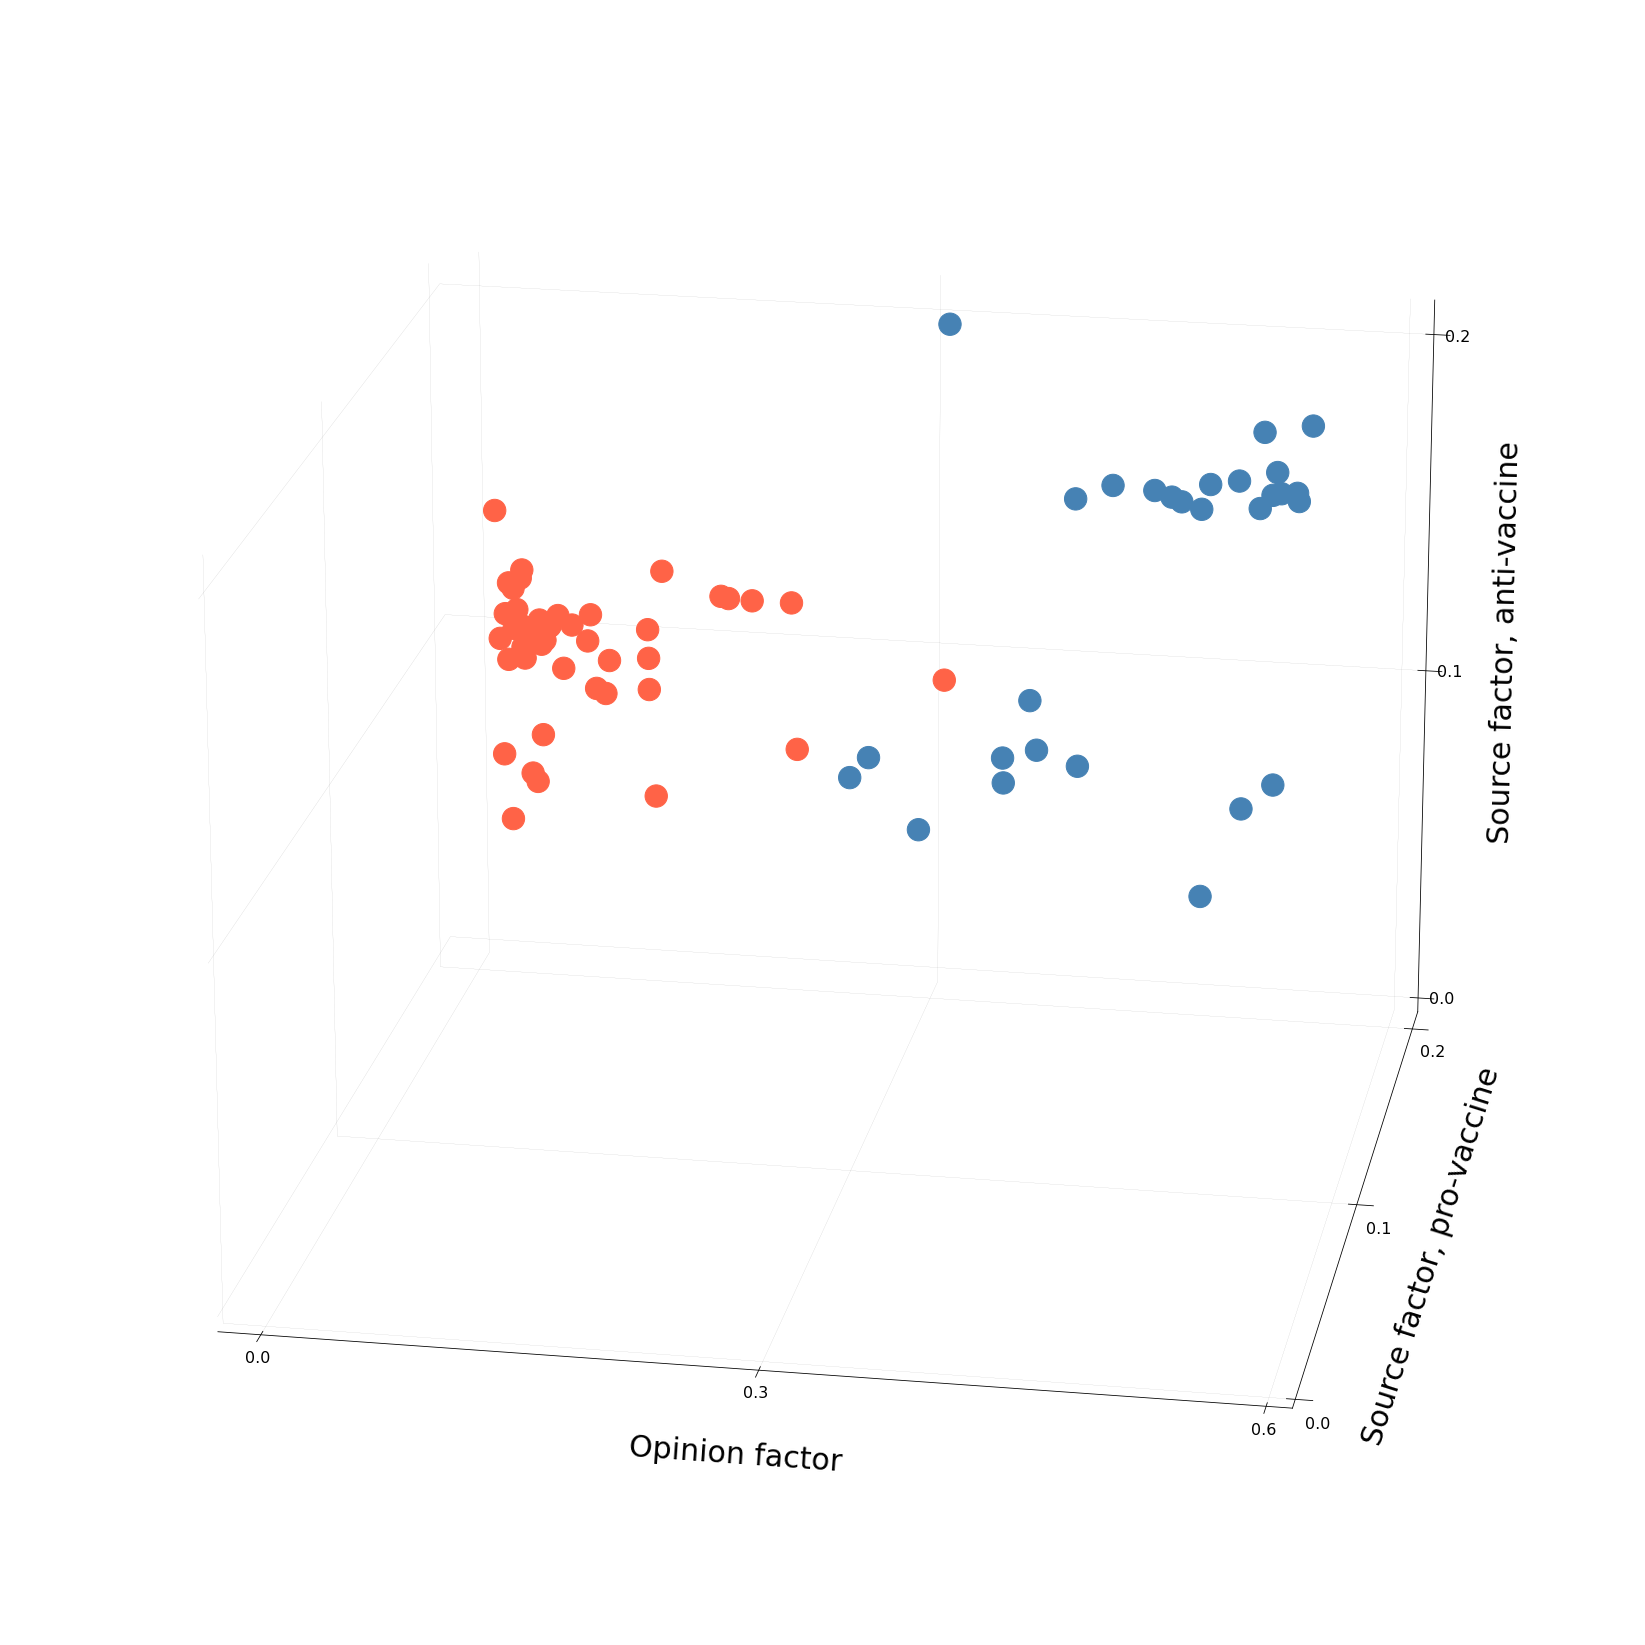

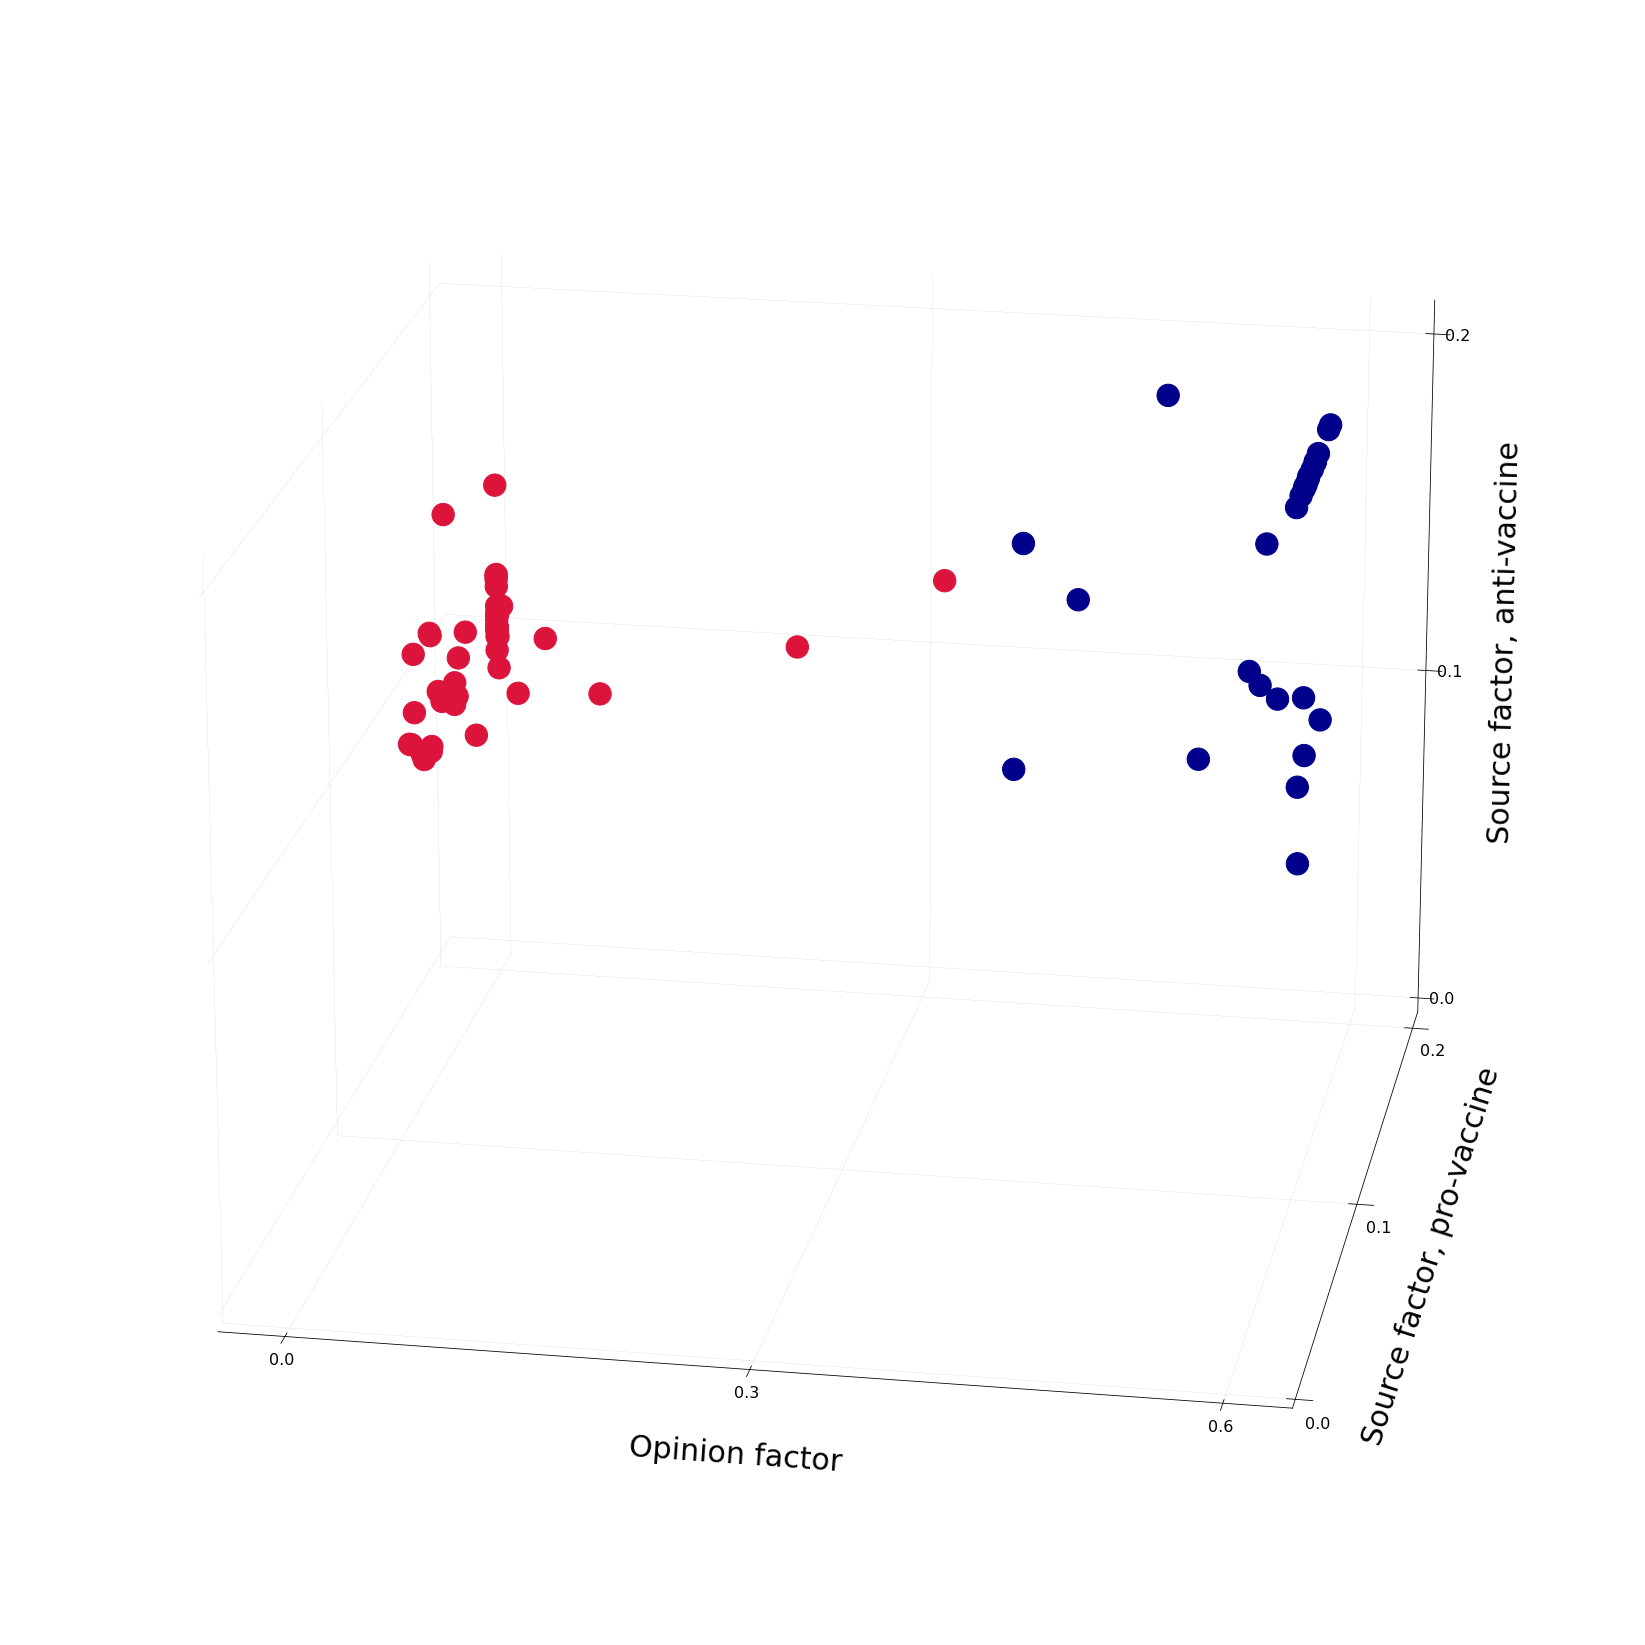

In [33]:
cluster_1_P1 = P1_ukr[P1_ukr['cluster']=='proR']
cluster_2_P1 = P1_ukr[P1_ukr['cluster']=='proU']
cluster_3_P1 = P1_ukr[P1_ukr['cluster']=='inter']

cluster_1_P2 = P2_ukr[P2_ukr['cluster']=='proR']
cluster_2_P2 = P2_ukr[P2_ukr['cluster']=='proU']
cluster_3_P2 = P2_ukr[(P2_ukr['cluster']=='interR') & P2_ukr.index.isin(inter_users_ukr)]
cluster_4_P2 = P2_ukr[(P2_ukr['cluster']=='interU') & P2_ukr.index.isin(inter_users_ukr)]

cluster_1_P3 = P3_ukr[(P3_ukr['cluster']=='proR') & P3_ukr.index.isin(inter_users_ukr)]
cluster_2_P3 = P3_ukr[(P3_ukr['cluster']=='proU') & P3_ukr.index.isin(inter_users_ukr)]


fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='orchid', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)
plt.savefig('inter_balanced_ukraine.pdf', format='pdf')

fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_3_P2['x'], cluster_3_P2['y_C1'], cluster_3_P2['y_C2'], marker ='o', c='tomato', s= 500, alpha=1)
ax.scatter(cluster_4_P2['x'], cluster_4_P2['y_C1'], cluster_4_P2['y_C2'], marker ='o', c='steelblue', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)
plt.savefig('inter_convergence_ukraine.pdf', format='pdf')

fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_1_P3['x'], cluster_1_P3['y_C1'], cluster_1_P3['y_C2'], marker ='o', c='crimson', s= 500, alpha=1)
ax.scatter(cluster_2_P3['x'], cluster_2_P3['y_C1'], cluster_2_P3['y_C2'], marker ='o', c='darkblue', s= 500, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel('Opinion factor', fontsize='30', labelpad=40)
ax.set_ylabel('Source factor, pro-vaccine', fontsize='30', labelpad=40)
ax.set_zlabel('Source factor, anti-vaccine', fontsize='30', labelpad=40)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)
plt.savefig('inter_polarized_ukraine.pdf', format='pdf')

# Sankey

In [34]:
import plotly.graph_objects as go
import plotly.io as pio
from webcolors import hex_to_rgb

In [35]:
def get_data_sankey(df):
    df_sankey = df.copy()
    df_sankey = df_sankey.T
    retweeters = df.columns.tolist()
    for i in tqdm(range(len(retweeters))):
        for j in range(0,15,1):
            df_sankey.loc[retweeters[i], j] = str(df_sankey.loc[retweeters[i], j])+'_'+str(j)

    df_sankey.columns = df_sankey.columns.astype(str)
    df_sankey.index.drop_duplicates()
    df_sankey = df_sankey.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')
    sankey_fig = df_sankey.groupby(df_sankey.columns.tolist()).size().reset_index().rename(columns={0:'count'})
    return df_sankey, sankey_fig

## COVID-19 vaccine debate

In [36]:
df, fig = get_data_sankey(clusters_vacc)

100%|██████████| 685/685 [00:00<00:00, 763.99it/s]


In [37]:
source = []
target = []
values = []
for p in tqdm(range(14)):
    data = df[[str(p),str(p+1)]]
    results = data.groupby(data.columns.tolist()).size().rename('sum')
    results = pd.DataFrame(results)

    for i in range(results.shape[0]):
        source.append(results.iloc[i].name[0])
        target.append(results.iloc[i].name[1])
        values.append(results.iloc[i].values[0])

100%|██████████| 14/14 [00:00<00:00, 352.89it/s]


In [38]:
nodes_labels = []
for p in range(15):
    for i in df[str(p)].unique().tolist():
        nodes_labels.append(i)

In [39]:
node_dict = {y:x for x, y in enumerate(nodes_labels)}

In [40]:
source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

In [41]:
node_color = ['#558948', '#94DA82', '#FEAF37', '#F2D270', '#558948', '#94DA82', '#FEAF37', '#F2D270', '#558948', '#94DA82', '#FEAF37', '#F2D270', '#558948', '#FEAF37', '#558948', '#FEAF37', '#558948', '#FEAF37', '#558948', '#FEAF37', '#558948', '#FEAF37', '#558948', '#FEAF37', '#558948', '#FEAF37', '#558948', '#FEAF37','#558948', '#FEAF37', '#558948', '#FEAF37', '#558948', '#FEAF37', '#558948', '#FEAF37']

In [42]:
node_label_color = {x:y for x, y in zip(nodes_labels, node_color)}
link_color = [node_label_color[x] for x in target]

In [43]:
link_color = ['rgba({},{},{}, 0.4)'.format(
    hex_to_rgb(x)[0],
    hex_to_rgb(x)[1],
    hex_to_rgb(x)[2]) for x in link_color] 

In [44]:
fig = go.Figure( 
    data=[go.Sankey(
        node = dict( 
            color = node_color
        ),
        link = dict(
            source = source_node,
            target = target_node,
            value = values,
            color = link_color,
        ))])

# fig.write_image('sankey_vaccine.pdf')
fig.show()

 ## Ukraine conflict debate

In [45]:
clusters_ukr_index = pd.read_csv('../results/temporal_analysis/ukraine_conflict_clusters.csv', index_col=0)

In [46]:
clusters_ukr_index.head()

,S1U,S2U,S3U,S4U,S5U,S6U,S7U,S8U,S10U,S12U,...,S979U,S981U,S983U,S986U,S988U,S990U,S996U,S997U,S998U,S999U
0,5,6,5,6,6,5,6,5,5,6,...,2,1,2,2,2,0,0,0,2,2
1,6,7,6,7,7,6,7,6,6,7,...,0,1,0,1,2,1,0,0,2,2
2,2,2,2,2,2,2,2,2,2,2,...,0,1,0,0,0,0,0,0,0,0
3,2,2,2,2,2,2,2,2,2,2,...,1,1,0,0,0,0,0,0,0,0
4,3,3,3,3,3,3,3,3,3,3,...,1,1,0,0,0,0,0,0,0,0


In [47]:
df, fig = get_data_sankey(clusters_ukr_index)

100%|██████████| 784/784 [00:01<00:00, 685.87it/s]


In [48]:
source = []
target = []
values = []
for p in tqdm(range(14)):
    data = df[[str(p),str(p+1)]]
    results = data.groupby(data.columns.tolist()).size().rename('sum')
    results = pd.DataFrame(results)

    for i in range(results.shape[0]):
        source.append(results.iloc[i].name[0])
        target.append(results.iloc[i].name[1])
        values.append(results.iloc[i].values[0])

100%|██████████| 14/14 [00:00<00:00, 266.27it/s]


In [49]:
nodes_labels = []
for p in range(15):
    for i in df[str(p)].unique().tolist():
        nodes_labels.append(i)

In [50]:
node_dict = {y:x for x, y in enumerate(nodes_labels)}

In [51]:
source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

In [52]:
node_color = ['#EE49D5', '#A569BD', '#1ABC9C', '#DE5DE2', '#F9BE38', '#38E1F9', '#F95538', '#8C44D1',
 '#EE49D5', '#A569BD', '#1ABC9C', '#DE5DE2', '#67F938','#F9BE38', '#38E1F9', '#F95538', '#8C44D1', 
 '#ED1F4B', '#F4A8FB', '#4E64E0', 
 '#ED1F4B', '#F4A8FB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#4E64E0', '#3498DB',
 '#ED1F4B', '#FAA04C', '#4E64E0', '#3498DB', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0',
 '#ED1F4B', '#3498DB', 
 '#ED1F4B', '#3498DB']

In [53]:
node_label_color = {x:y for x, y in zip(nodes_labels, node_color)}
link_color = [node_label_color[x] for x in target]

In [54]:
link_color = ['rgba({},{},{}, 0.4)'.format(
    hex_to_rgb(x)[0],
    hex_to_rgb(x)[1],
    hex_to_rgb(x)[2]) for x in link_color] 

In [55]:
fig = go.Figure( 
    data=[go.Sankey(
        node = dict( 
            color = node_color
        ),
        link = dict(
            source = source_node,
            target = target_node,
            value = values,
            color = link_color,
        ))])

# fig.write_image('sankey_ukraine.pdf')
fig.show()